In [3]:
from IPython.display import Image
%load_ext autoreload
%autoreload 2
import numpy as np
from neural_networks.utils.grad_check import check_gradients
from neural_networks.layers import FullyConnected, Elman, Conv2D
from neural_networks.activations import Linear, Sigmoid, TanH, ReLU, SoftMax

# Honor Code

# “I certify that all solutions are entirely in my own words and that I have not looked at another student’s solutions. I have given credit to all external sources I consulted.”


# 3.1

## Gradient Checker
### Linear Activation

In [2]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 3)

# initialize a fully connected layer
# and perform a forward and backward pass
linear_activation = Linear()
_ = linear_activation.forward(X)
grad = linear_activation.backward(X, dLdY)

# check the gradients w.r.t. each parameter
print(
    
    f"Relative error for linear activation:",
    
    check_gradients(
        fn=linear_activation.forward,  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=X,        # the variable w.r.t. which we are taking the gradient
        dLdf=dLdY,  # gradient at previous layer
    )
)

Relative error for linear activation: 1.668681370207644e-11


### Sigmoid Activation

In [3]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 3)

# initialize a fully connected layer
# and perform a forward and backward pass
sigmoid_activation = Sigmoid()
_ = sigmoid_activation.forward(X)
grad = sigmoid_activation.backward(X, dLdY)

# check the gradients w.r.t. each parameter
print(
    f"Relative error for sigmoid activation:",
    check_gradients(
        fn=sigmoid_activation.forward,  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=X,        # the variable w.r.t. which we are taking the gradient
        dLdf=dLdY,  # gradient at previous layer
    )
)

Relative error for sigmoid activation: 9.171022379629733e-11


### Tanh Activation

In [4]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 3)

# initialize a fully connected layer
# and perform a forward and backward pass
tanh_activation = TanH()
_ = tanh_activation.forward(X)
grad = tanh_activation.backward(X, dLdY)

# check the gradients w.r.t. each parameter
print(
    f"Relative error for tanh activation:",
    check_gradients(
        fn=tanh_activation.forward,  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=X,        # the variable w.r.t. which we are taking the gradient
        dLdf=dLdY,  # gradient at previous layer
    )
)

Relative error for tanh activation: 3.5061254997548696e-11


### Relu Activation

In [5]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 3)

# initialize a fully connected layer
# and perform a forward and backward pass
relu_activation = ReLU()
out = relu_activation.forward(X)
grad = relu_activation.backward(X, dLdY)

# check the gradients w.r.t. each parameter
print(
    f"Relative error for relu activation:",
    check_gradients(
        fn=relu_activation.forward,  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=X,        # the variable w.r.t. which we are taking the gradient
        dLdf=dLdY,  # gradient at previous layer
    )
)

Relative error for relu activation: 3.490277181680821e-11


### Softmax Activation

In [6]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 3)

# initialize a fully connected layer
# and perform a forward and backward pass
softmax_activation = SoftMax()
_ = softmax_activation.forward(X)
grad = softmax_activation.backward(X, dLdY)

# check the gradients w.r.t. each parameter
print(
    f"Relative error for softmax activation:",
    check_gradients(
        fn=softmax_activation.forward,  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=X,        # the variable w.r.t. which we are taking the gradient
        dLdf=dLdY,  # gradient at previous layer
    )
)

Relative error for softmax activation: 5.484210406817115e-11


### Fully Connected Layer

In [13]:
X = np.random.randn(2, 3)
dLdY = np.random.randn(2, 4)

# initialize a fully connected layer
# and perform a forward and backward pass
fc_layer = FullyConnected(n_out=4, activation="linear")
_ = fc_layer.forward(X)
_ = fc_layer.backward(dLdY)

# check the gradients w.r.t. each parameter
for param in fc_layer.parameters:
    print(
        f"Relative error for {param}:",
        check_gradients(
            fn=fc_layer.forward_with_param(param, X),  # the function we are checking
            grad=fc_layer.gradients[param],  # the analytically computed gradient
            x=fc_layer.parameters[param],  # the variable w.r.t. which we are taking the gradient
            dLdf=dLdY,                     # gradient at previous layer
        )
    )

X (2, 3) Weights:  (3, 4) biases (1, 4)
Relative error for W: 2.3118346860599167e-11
Relative error for b: 1.0549597413649993e-11


### Cross Entropy Loss

In [12]:
from neural_networks.losses import CrossEntropy

num_pts = 5
num_classes = 6

# one-hot encoded y
y_idxs = np.random.randint(0, num_classes, (num_pts,))
y = np.zeros((num_pts, num_classes))
y[range(num_pts), y_idxs] = 1

# normalized predictions
scores = np.random.uniform(0, 1, size=(num_pts, num_classes))
y_hat = scores / scores.sum(axis=1, keepdims=True)

cross_entropy_loss = CrossEntropy("cross_entropy")

def forward_fn(Y, Y_hat):    
    def inner_forward(Y_hat):
        return cross_entropy_loss.forward(Y, Y_hat)
    return inner_forward

loss = cross_entropy_loss.forward(y, y_hat)
grad = cross_entropy_loss.backward(y, y_hat)

print(
    f"Relative error for cross entropy loss:",
    check_gradients(
        fn=forward_fn(y, y_hat),  # the function we are checking
        grad=grad,  # the analytically computed gradient
        x=y_hat,        # the variable w.r.t. which we are taking the gradient
        dLdf=1,  # gradient at previous layer
    )
)

Relative error for cross entropy loss: 4.568708311853129e-07


# 3.2

In [ ]:
def train_iris(h_layer, lr):
    layer_1 = AttrDict(
        {
            "name": "fully_connected",
            "activation": "relu",
            "weight_init": "xavier_uniform",
            "n_out": h_layer,
        }
    )

    layer_out = AttrDict({
        "name": "fully_connected",
        "activation": "softmax",
        "weight_init": "xavier_uniform",
        "n_out": None
        # n_out is not defined for last layer. This will be set by the dataset.
    }
    )

    """
    Step 2: Collect layer argument dictionaries into a list.

    - This defines the order of layers in the network.
    """

    layer_args = [layer_1, layer_out]

    """
    Step 3: Define model, data, and logger arguments

    - The list of layer_args is passed to the model initializer.
    """

    optimizer_args = AttrDict(
        {
            "name": "SGD",
            "lr": lr,
            "lr_scheduler": "constant",
            "lr_decay": None,
            "stage_length": None,
            "staircase": None,
            "clip_norm": None,
            "momentum": 0.05,
        }
    )

    model_args = AttrDict(
        {
            "name": "iris_model_"+str(h_layer) +"_"+str(lr),
            "loss": 'cross_entropy',
            "layer_args": layer_args,
            "optimizer_args": optimizer_args,
            "seed": 17
        }
    )

    data_args = AttrDict(
        {
            "name": "iris",  # YOUR CODE HERE, name of dataset, e.g. "iris"
            "batch_size": 5
        }
    )

    log_args = AttrDict(
        {"save": True, "plot": True, "save_dir": "experiments/", }
    )

    """
    Step 4: Set random seed

    Warning! Random seed must be set before importing other modules.
    """

    import numpy as np

    np.random.seed(model_args.seed)

    """
    Step 5: Define model name for saving
    """

    model_name = model_args.name  # YOUR CODE HERE
    logger = Logger(
        model_name=model_name,
        model_args=model_args,
        data_args=data_args,
        save=log_args.save,
        plot=log_args.plot,
        save_dir=log_args.save_dir,
    )

    model = initialize_model(
        name=model_args.name,
        loss=model_args.loss,
        layer_args=model_args.layer_args,
        optimizer_args=model_args.optimizer_args,
        logger=logger,
    )

    dataset = initialize_dataset(
        name=data_args.name,
        batch_size=data_args.batch_size,
    )

    """
    Step 7: Train model!
    """

    epochs = 100

    print(
        "Training {} neural network on {} with {} for {} epochs...".format(
            model_args.name, data_args.name, optimizer_args.name, epochs
        )
    )

    print("Optimizer:")
    print(optimizer_args)

    final_results = model.train(dataset, epochs=epochs)
    test_log= model.test(dataset)
    final_results["test_error"] = test_log["test_error"]
    return final_results

In [18]:
import pandas as pd

In [20]:
combs = pd.DataFrame()
combs["learning_rate"] = [0.1, 0.1, 0.01, 0.01]
combs["hidden_layer_size"] = [7, 14, 7, 14]
results = []

for lr in [0.1, 0.01]:
    for hl in [25, 50]:
        results.append(train_iris(hl, lr))

Training iris_model_25_0.1 neural network on iris with SGD for 100 epochs...
Optimizer:
{'name': 'SGD', 'lr': 0.1, 'lr_scheduler': 'constant', 'lr_decay': None, 'stage_length': None, 'staircase': None, 'clip_norm': None, 'momentum': 0.05}


X (5, 4) Weights:  (4, 25) biases (1, 25)
X (5, 25) Weights:  (25, 3) biases (1, 3)
Example target: [1. 0. 0.]
Example prediction: [0.9429, 0.0501, 0.007]
Epoch 0 Training Loss: 1.5127 Training Accuracy: 0.619 Val Loss: 0.2806 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.9584, 0.0384, 0.0032]
Epoch 1 Training Loss: 0.4361 Training Accuracy: 0.819 Val Loss: 0.2817 Val Accuracy: 0.8
Example target: [0. 0. 1.]
Example prediction: [0.0026, 0.2405, 0.7569]
Epoch 2 Training Loss: 0.4911 Training Accuracy: 0.7333 Val Loss: 0.2007 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0019, 0.4415, 0.5567]
Epoch 3 Training Loss: 0.3497 Training Accuracy: 0.819 Val Loss: 0.2132 Val Accuracy: 0.9333
Example target: [0. 1. 0.]
Example prediction: [0.008, 0.3865, 0.6055]
Epoch 4 Training Loss: 0.4537 Training Accuracy: 0.8286 Val Loss: 0.2175 Val Accuracy: 0.8
Example target: [0. 0. 1.]
Example prediction: [0.0037, 0.3739, 0.6223]
Epoch 5 Training Loss: 0.4518 T

Example target: [1. 0. 0.]
Example prediction: [1.0, 0.0, 0.0]
Epoch 51 Training Loss: 0.1352 Training Accuracy: 0.9238 Val Loss: 0.0082 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.999, 0.001, 0.0]
Epoch 52 Training Loss: 0.1936 Training Accuracy: 0.9143 Val Loss: 0.0126 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0, 0.0311, 0.9689]
Epoch 53 Training Loss: 0.1186 Training Accuracy: 0.9524 Val Loss: 0.0413 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [1.0, 0.0, 0.0]
Epoch 54 Training Loss: 0.09 Training Accuracy: 0.9619 Val Loss: 0.0088 Val Accuracy: 1.0
Example target: [0. 1. 0.]
Example prediction: [0.0104, 0.971, 0.0185]
Epoch 55 Training Loss: 0.181 Training Accuracy: 0.9429 Val Loss: 0.0219 Val Accuracy: 1.0
Example target: [0. 1. 0.]
Example prediction: [0.0048, 0.9876, 0.0076]
Epoch 56 Training Loss: 0.1107 Training Accuracy: 0.9619 Val Loss: 0.027 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: 

X (5, 4) Weights:  (4, 50) biases (1, 50)
X (5, 50) Weights:  (50, 3) biases (1, 3)
Example target: [0. 0. 1.]
Example prediction: [0.0025, 0.1536, 0.8439]
Epoch 0 Training Loss: 1.3757 Training Accuracy: 0.5619 Val Loss: 0.2617 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.9708, 0.0261, 0.0031]
Epoch 1 Training Loss: 0.4482 Training Accuracy: 0.7524 Val Loss: 0.2217 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9974, 0.0023, 0.0002]
Epoch 2 Training Loss: 0.4775 Training Accuracy: 0.7714 Val Loss: 0.2115 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.9856, 0.0127, 0.0016]
Epoch 3 Training Loss: 0.4573 Training Accuracy: 0.7429 Val Loss: 0.2457 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0009, 0.2481, 0.7509]
Epoch 4 Training Loss: 0.3554 Training Accuracy: 0.8762 Val Loss: 0.1267 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0009, 0.318, 0.6811]
Epoch 5 Training Loss: 0.4109 

Example target: [0. 0. 1.]
Example prediction: [0.0, 0.0323, 0.9677]
Epoch 51 Training Loss: 0.1683 Training Accuracy: 0.9333 Val Loss: 0.0304 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0, 0.0867, 0.9133]
Epoch 52 Training Loss: 0.2891 Training Accuracy: 0.8762 Val Loss: 0.0409 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9987, 0.0013, 0.0]
Epoch 53 Training Loss: 0.1188 Training Accuracy: 0.9714 Val Loss: 0.0303 Val Accuracy: 1.0
Example target: [0. 1. 0.]
Example prediction: [0.015, 0.9565, 0.0286]
Epoch 54 Training Loss: 0.1172 Training Accuracy: 0.9714 Val Loss: 0.0356 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9988, 0.0012, 0.0]
Epoch 55 Training Loss: 0.2359 Training Accuracy: 0.8667 Val Loss: 0.1226 Val Accuracy: 0.9333
Example target: [1. 0. 0.]
Example prediction: [1.0, 0.0, 0.0]
Epoch 56 Training Loss: 0.1635 Training Accuracy: 0.9048 Val Loss: 0.1531 Val Accuracy: 0.9333
Example target: [1. 0. 0.]
Examp

X (5, 4) Weights:  (4, 25) biases (1, 25)
X (5, 25) Weights:  (25, 3) biases (1, 3)
Example target: [1. 0. 0.]
Example prediction: [0.62, 0.1679, 0.2121]
Epoch 0 Training Loss: 1.0704 Training Accuracy: 0.5619 Val Loss: 0.6123 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.6827, 0.1069, 0.2104]
Epoch 1 Training Loss: 0.6481 Training Accuracy: 0.7619 Val Loss: 0.5705 Val Accuracy: 0.8
Example target: [0. 0. 1.]
Example prediction: [0.053, 0.2996, 0.6474]
Epoch 2 Training Loss: 0.644 Training Accuracy: 0.7429 Val Loss: 0.3924 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0345, 0.5732, 0.3923]
Epoch 3 Training Loss: 0.5406 Training Accuracy: 0.781 Val Loss: 0.4202 Val Accuracy: 0.8
Example target: [0. 1. 0.]
Example prediction: [0.089, 0.3888, 0.5223]
Epoch 4 Training Loss: 0.5143 Training Accuracy: 0.7714 Val Loss: 0.3162 Val Accuracy: 0.8
Example target: [0. 0. 1.]
Example prediction: [0.0197, 0.4557, 0.5245]
Epoch 5 Training Loss: 0.5069 Train

Example target: [0. 1. 0.]
Example prediction: [0.0361, 0.9243, 0.0396]
Epoch 50 Training Loss: 0.1416 Training Accuracy: 0.9714 Val Loss: 0.0635 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9988, 0.0012, 0.0]
Epoch 51 Training Loss: 0.1527 Training Accuracy: 0.9429 Val Loss: 0.0479 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9836, 0.0164, 0.0]
Epoch 52 Training Loss: 0.1371 Training Accuracy: 0.9714 Val Loss: 0.0448 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0002, 0.1484, 0.8514]
Epoch 53 Training Loss: 0.1345 Training Accuracy: 0.9619 Val Loss: 0.0859 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9988, 0.0012, 0.0]
Epoch 54 Training Loss: 0.1328 Training Accuracy: 0.9619 Val Loss: 0.0485 Val Accuracy: 1.0
Example target: [0. 1. 0.]
Example prediction: [0.0319, 0.917, 0.0511]
Epoch 55 Training Loss: 0.1262 Training Accuracy: 0.9429 Val Loss: 0.0414 Val Accuracy: 1.0
Example target: [0. 1. 0.]

X (5, 4) Weights:  (4, 50) biases (1, 50)
X (5, 50) Weights:  (50, 3) biases (1, 3)
Example target: [0. 0. 1.]
Example prediction: [0.0167, 0.2564, 0.727]
Epoch 0 Training Loss: 0.6832 Training Accuracy: 0.7143 Val Loss: 0.4507 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.814, 0.1367, 0.0493]
Epoch 1 Training Loss: 0.581 Training Accuracy: 0.7333 Val Loss: 0.3977 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.9621, 0.023, 0.0149]
Epoch 2 Training Loss: 0.5187 Training Accuracy: 0.7714 Val Loss: 0.3523 Val Accuracy: 0.8
Example target: [1. 0. 0.]
Example prediction: [0.9187, 0.0643, 0.0169]
Epoch 3 Training Loss: 0.5132 Training Accuracy: 0.7238 Val Loss: 0.2997 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0201, 0.2635, 0.7163]
Epoch 4 Training Loss: 0.4313 Training Accuracy: 0.8 Val Loss: 0.2716 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0076, 0.3445, 0.648]
Epoch 5 Training Loss: 0.4415 Trainin

Example target: [0. 0. 1.]
Example prediction: [0.0001, 0.1421, 0.8577]
Epoch 50 Training Loss: 0.1384 Training Accuracy: 0.9619 Val Loss: 0.0692 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0005, 0.1338, 0.8657]
Epoch 51 Training Loss: 0.1299 Training Accuracy: 0.9524 Val Loss: 0.0423 Val Accuracy: 1.0
Example target: [0. 0. 1.]
Example prediction: [0.0001, 0.0943, 0.9056]
Epoch 52 Training Loss: 0.166 Training Accuracy: 0.9429 Val Loss: 0.0525 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9837, 0.0163, 0.0]
Epoch 53 Training Loss: 0.1268 Training Accuracy: 0.9619 Val Loss: 0.0388 Val Accuracy: 1.0
Example target: [0. 1. 0.]
Example prediction: [0.0356, 0.9319, 0.0325]
Epoch 54 Training Loss: 0.1226 Training Accuracy: 0.981 Val Loss: 0.0586 Val Accuracy: 1.0
Example target: [1. 0. 0.]
Example prediction: [0.9819, 0.0181, 0.0]
Epoch 55 Training Loss: 0.1305 Training Accuracy: 0.9619 Val Loss: 0.1193 Val Accuracy: 0.9333
Example target: [1. 0

In [21]:

combs["training error"] = [r["train_error"] for r in results]
combs["val_error"] = [r["val_error"] for r in results]
combs["test_error"] = [r["test_error"] for r in results]
combs

,learning_rate,hidden_layer_size,training error,val_error,test_error
0,0.10,7,0.114286,0.0,0.066667
1,0.10,14,0.057143,0.0,0.033333
2,0.01,7,0.057143,0.0,0.066667
3,0.01,14,0.038095,0.0,0.066667


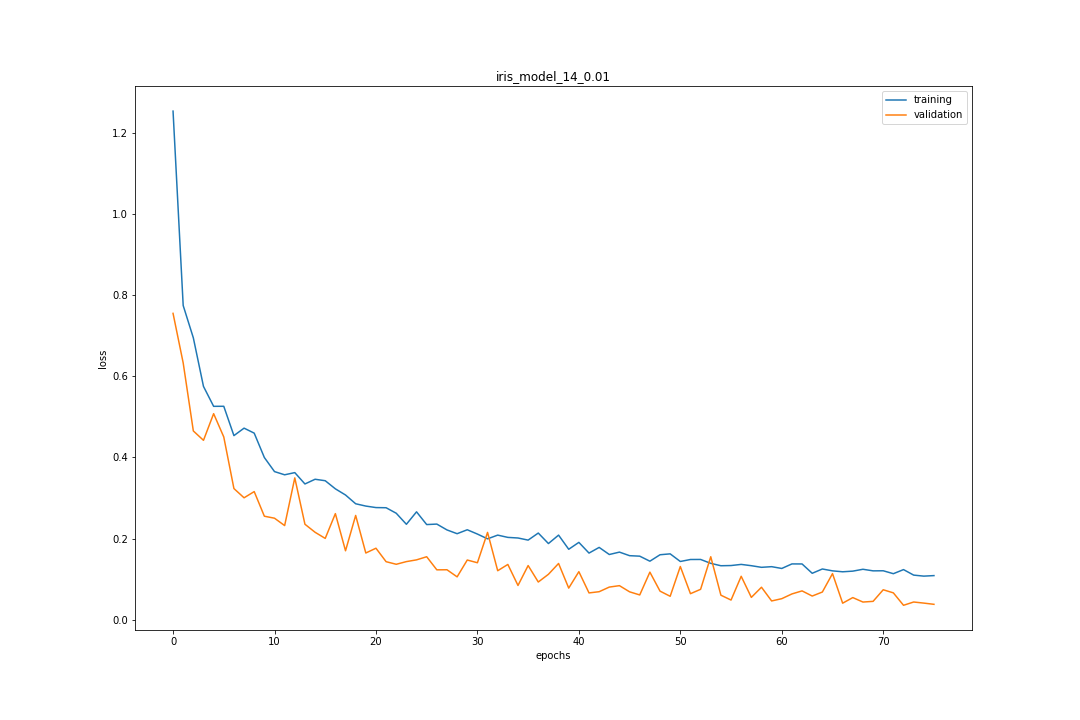

In [22]:
from IPython.display import Image
Image("experiments/iris_model_14_0.01/loss.png")

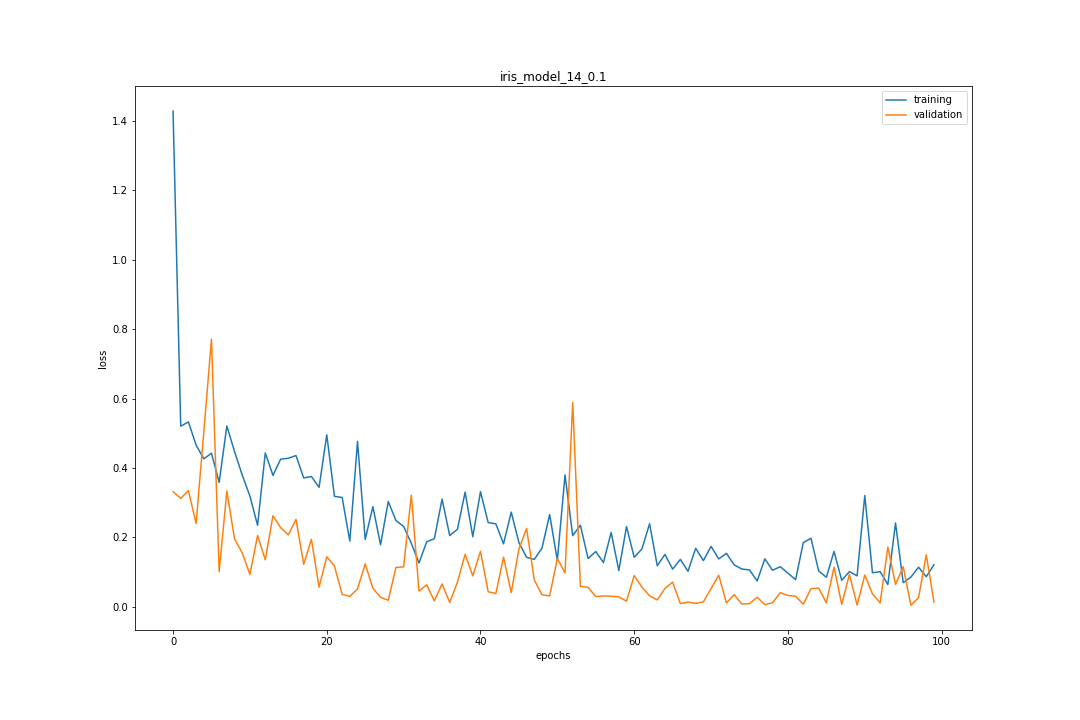

In [23]:
Image("experiments/iris_model_14_0.1//loss.png")

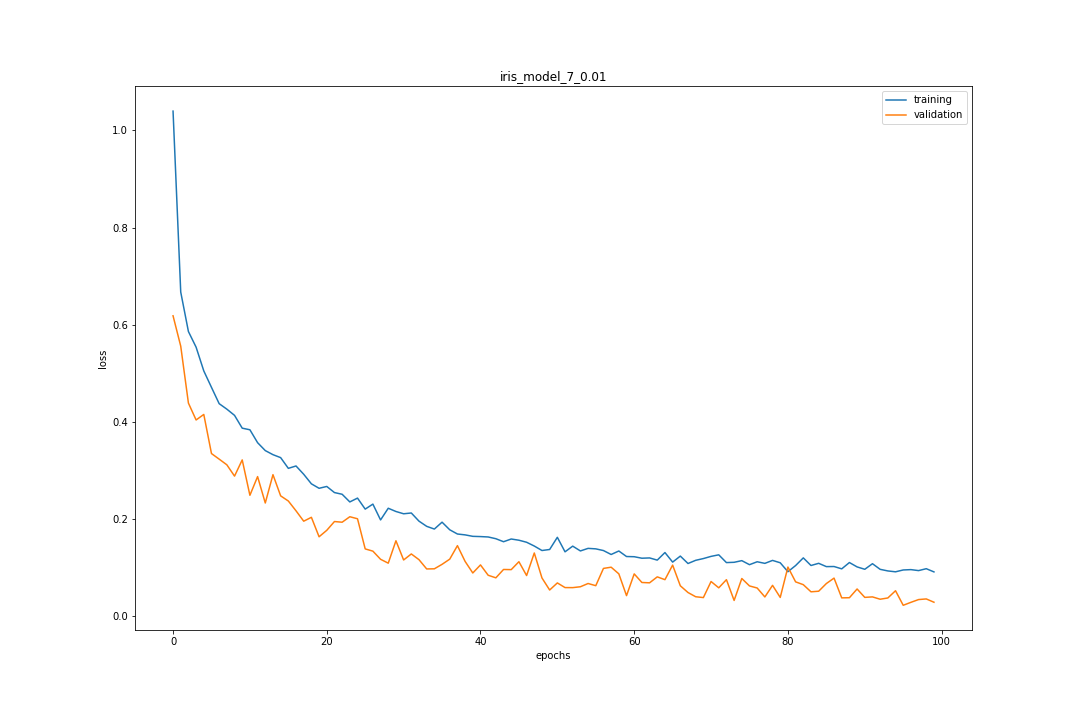

In [24]:
Image("experiments/iris_model_7_0.01/loss.png")

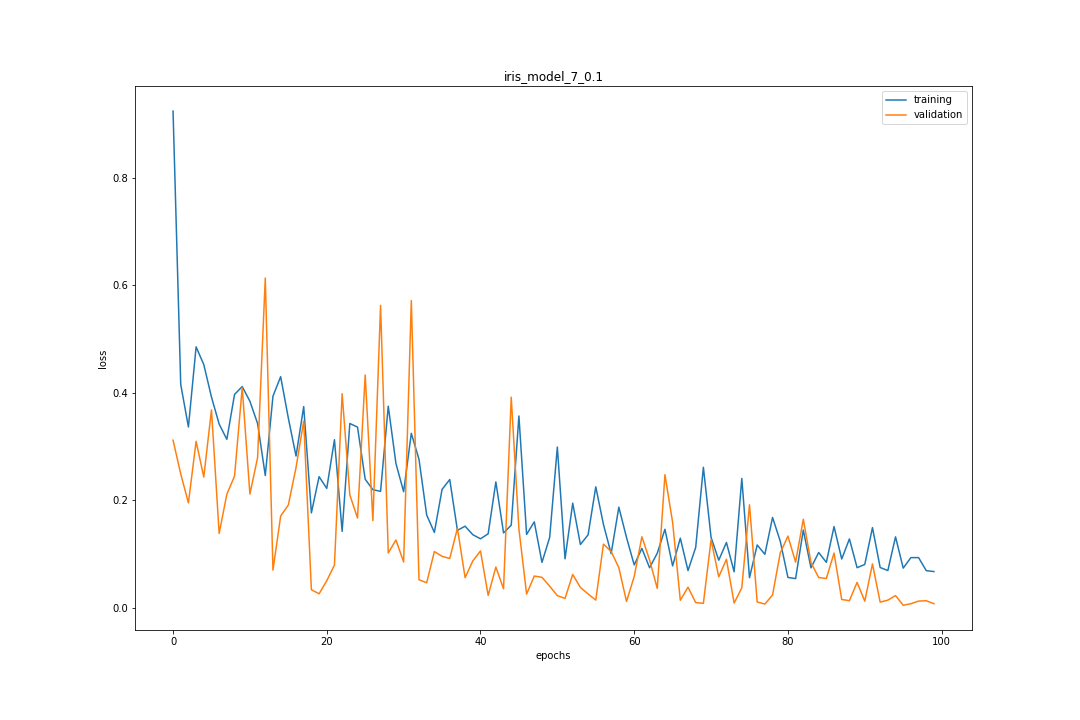

In [25]:

Image("experiments/iris_model_7_0.1/loss.png")

Final Test Error: 0.033

# 3.3

In [19]:
"""
Author: Sophia Sanborn
Institution: UC Berkeley
Date: Spring 2020
Course: CS189/289A
Website: github.com/sophiaas
"""

"""
Step 1: Define layer arguments

- Define the arguments for each layer in an attribute dictionary (AttrDict).
- An attribute dictionary is exactly like a dictionary, except you can access the values as attributes rather than keys...for cleaner code :)
- See layers.py for the arguments expected by each layer type.
"""

from neural_networks.utils.data_structures import AttrDict

layer_1 = AttrDict(
    {
        "name": "fully_connected",
        "activation": "relu",
        "weight_init": "xavier_uniform",
        "n_out": 50,
    }
)

layer_2 = AttrDict(
    {
        "name": "fully_connected",
        "activation": "relu",
        "weight_init": "xavier_uniform",
        "n_out": 30,
    }
)

layer_3 = AttrDict(
    {
        "name": "fully_connected",
        "activation": "relu",
        "weight_init": "xavier_uniform",
        "n_out": 15,
    }
)

layer_4 = AttrDict(
    {
        "name": "fully_connected",
        "activation": "relu",
        "weight_init": "xavier_uniform",
        "n_out": 10,
    }
)

layer_out = AttrDict({
    "name": "fully_connected",
    "activation": "softmax",
    "weight_init": "xavier_uniform",
    "n_out": None
    # n_out is not defined for last layer. This will be set by the dataset.
}
)

"""
Step 2: Collect layer argument dictionaries into a list.

- This defines the order of layers in the network.
"""

layer_args = [layer_1, layer_2, layer_3, layer_4, layer_out]

"""
Step 3: Define model, data, and logger arguments

- The list of layer_args is passed to the model initializer.
"""

optimizer_args = AttrDict(
    {
        "name": "SGD",
        "lr": 0.05,
        "lr_scheduler": "exponential",
        "lr_decay": 0.8,
        "stage_length": 5,
        "staircase": 1,
        "clip_norm": 1.0,
        "momentum": 0.9,
    }
)

model_args = AttrDict(
    {
        "name": "higgs_model",
        "loss": 'cross_entropy',
        "layer_args": layer_args,
        "optimizer_args": optimizer_args,
        "seed": 24
    }
)

data_args = AttrDict(
    {
        "name": "higgs",  # YOUR CODE HERE, name of dataset, e.g. "iris"
        "batch_size": 25
    }
)

log_args = AttrDict(
    {"save": True, "plot": True, "save_dir": "experiments/", }
)

"""
Step 4: Set random seed

Warning! Random seed must be set before importing other modules.
"""

import numpy as np

np.random.seed(model_args.seed)

"""
Step 5: Define model name for saving
"""

model_name = model_args.name  # YOUR CODE HERE

"""
Step 6: Initialize logger, model, and dataset

- model_name, model_args, and data_args are passed to the logger for saving
- The logger is passed to the model.
"""

from neural_networks.models import initialize_model
from neural_networks.datasets import initialize_dataset
from neural_networks.logs import Logger

logger = Logger(
    model_name=model_name,
    model_args=model_args,
    data_args=data_args,
    save=log_args.save,
    plot=log_args.plot,
    save_dir=log_args.save_dir,
)

model = initialize_model(
    name=model_args.name,
    loss=model_args.loss,
    layer_args=model_args.layer_args,
    optimizer_args=model_args.optimizer_args,
    logger=logger,
)

dataset = initialize_dataset(
    name=data_args.name,
    batch_size=data_args.batch_size,
)

"""
Step 7: Train model!
"""

epochs = 200

print(
    "Training {} neural network on {} with {} for {} epochs...".format(
        model_args.name, data_args.name, optimizer_args.name, epochs
    )
)

print("Optimizer:")
print(optimizer_args)

final_results = model.train(dataset, epochs=epochs)

  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:54,  8.79it/s]

Training higgs_model neural network on higgs with SGD for 200 epochs...
Optimizer:
{'name': 'SGD', 'lr': 0.05, 'lr_scheduler': 'exponential', 'lr_decay': 0.8, 'stage_length': 5, 'staircase': 1, 'clip_norm': 1.0, 'momentum': 0.9}
X (25, 28) Weights:  (28, 50) biases (1, 50)
X (25, 50) Weights:  (50, 30) biases (1, 30)
X (25, 30) Weights:  (30, 15) biases (1, 15)
X (25, 15) Weights:  (15, 10) biases (1, 10)
X (25, 10) Weights:  (10, 2) biases (1, 2)


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.444, 0.556]
Epoch 0 Training Loss: 0.644 Training Accuracy: 0.6218 Val Loss: 0.6179 Val Accuracy: 0.6527


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:53,  8.80it/s]

Example target: [0. 1.]
Example prediction: [0.4771, 0.5229]
Epoch 1 Training Loss: 0.613 Training Accuracy: 0.6689 Val Loss: 0.6223 Val Accuracy: 0.6631


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [1. 0.]
Example prediction: [0.5761, 0.4239]
Epoch 2 Training Loss: 0.6034 Training Accuracy: 0.677 Val Loss: 0.6086 Val Accuracy: 0.6779


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:14,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.6444, 0.3556]
Epoch 3 Training Loss: 0.5968 Training Accuracy: 0.6831 Val Loss: 0.6114 Val Accuracy: 0.6683


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:33,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.592, 0.408]
Epoch 4 Training Loss: 0.5937 Training Accuracy: 0.685 Val Loss: 0.5843 Val Accuracy: 0.6856


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:34,  9.64it/s]

Example target: [0. 1.]
Example prediction: [0.5311, 0.4689]
Epoch 5 Training Loss: 0.5884 Training Accuracy: 0.6894 Val Loss: 0.5916 Val Accuracy: 0.6702


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.6107, 0.3893]
Epoch 6 Training Loss: 0.5849 Training Accuracy: 0.6924 Val Loss: 0.5798 Val Accuracy: 0.6936


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:13,  8.72it/s]

Example target: [0. 1.]
Example prediction: [0.4567, 0.5433]
Epoch 7 Training Loss: 0.5828 Training Accuracy: 0.6942 Val Loss: 0.5933 Val Accuracy: 0.6819


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.5799, 0.4201]
Epoch 8 Training Loss: 0.5796 Training Accuracy: 0.6968 Val Loss: 0.5731 Val Accuracy: 0.7005


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.3576, 0.6424]
Epoch 9 Training Loss: 0.5776 Training Accuracy: 0.698 Val Loss: 0.5796 Val Accuracy: 0.6966


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.3791, 0.6209]
Epoch 10 Training Loss: 0.5738 Training Accuracy: 0.7003 Val Loss: 0.5931 Val Accuracy: 0.6896


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.0846, 0.9154]
Epoch 11 Training Loss: 0.5718 Training Accuracy: 0.7025 Val Loss: 0.566 Val Accuracy: 0.7102


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.4759, 0.5241]
Epoch 12 Training Loss: 0.5706 Training Accuracy: 0.7038 Val Loss: 0.5784 Val Accuracy: 0.6859


  1%|█▎                                                                                                                                                                                       | 144/20000 [00:00<24:19, 13.60it/s]

Example target: [0. 1.]
Example prediction: [0.3951, 0.6049]
Epoch 13 Training Loss: 0.568 Training Accuracy: 0.7069 Val Loss: 0.5786 Val Accuracy: 0.6967


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.2982, 0.7018]
Epoch 14 Training Loss: 0.5667 Training Accuracy: 0.7068 Val Loss: 0.5616 Val Accuracy: 0.7073


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.8129, 0.1871]
Epoch 15 Training Loss: 0.5647 Training Accuracy: 0.7084 Val Loss: 0.5627 Val Accuracy: 0.7081


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.04it/s]

Example target: [1. 0.]
Example prediction: [0.5765, 0.4235]
Epoch 16 Training Loss: 0.563 Training Accuracy: 0.71 Val Loss: 0.5616 Val Accuracy: 0.7115


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.402, 0.598]
Epoch 17 Training Loss: 0.5615 Training Accuracy: 0.7107 Val Loss: 0.5569 Val Accuracy: 0.7108


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:13,  8.72it/s]

Example target: [0. 1.]
Example prediction: [0.3323, 0.6677]
Epoch 18 Training Loss: 0.5607 Training Accuracy: 0.711 Val Loss: 0.5558 Val Accuracy: 0.7117


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.0939, 0.9061]
Epoch 19 Training Loss: 0.5578 Training Accuracy: 0.7128 Val Loss: 0.5637 Val Accuracy: 0.7008


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.7674, 0.2326]
Epoch 20 Training Loss: 0.5558 Training Accuracy: 0.7149 Val Loss: 0.5565 Val Accuracy: 0.714


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.6393, 0.3607]
Epoch 21 Training Loss: 0.5549 Training Accuracy: 0.7142 Val Loss: 0.5541 Val Accuracy: 0.7144


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.2005, 0.7995]
Epoch 22 Training Loss: 0.5526 Training Accuracy: 0.7167 Val Loss: 0.5552 Val Accuracy: 0.7179


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.35, 0.65]
Epoch 23 Training Loss: 0.5503 Training Accuracy: 0.7186 Val Loss: 0.5463 Val Accuracy: 0.7168


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [0. 1.]
Example prediction: [0.5392, 0.4608]
Epoch 24 Training Loss: 0.5487 Training Accuracy: 0.7191 Val Loss: 0.5467 Val Accuracy: 0.7195


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.8478, 0.1522]
Epoch 25 Training Loss: 0.5472 Training Accuracy: 0.7198 Val Loss: 0.5459 Val Accuracy: 0.7218


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.238, 0.762]
Epoch 26 Training Loss: 0.5459 Training Accuracy: 0.7211 Val Loss: 0.5446 Val Accuracy: 0.7168


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:33,  8.43it/s]

Example target: [1. 0.]
Example prediction: [0.6159, 0.3841]
Epoch 27 Training Loss: 0.5437 Training Accuracy: 0.7224 Val Loss: 0.5409 Val Accuracy: 0.7197


  0%|                                                                                                                                                                                           | 1/20000 [00:00<40:12,  8.29it/s]

Example target: [0. 1.]
Example prediction: [0.6842, 0.3158]
Epoch 28 Training Loss: 0.542 Training Accuracy: 0.7229 Val Loss: 0.5477 Val Accuracy: 0.7219


  0%|                                                                                                                                                                                           | 1/20000 [00:00<42:13,  7.89it/s]

Example target: [0. 1.]
Example prediction: [0.2371, 0.7629]
Epoch 29 Training Loss: 0.5411 Training Accuracy: 0.7241 Val Loss: 0.5424 Val Accuracy: 0.7137


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.6861, 0.3139]
Epoch 30 Training Loss: 0.5391 Training Accuracy: 0.7256 Val Loss: 0.5413 Val Accuracy: 0.7217


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:33,  9.12it/s]

Example target: [0. 1.]
Example prediction: [0.5495, 0.4505]
Epoch 31 Training Loss: 0.5373 Training Accuracy: 0.7261 Val Loss: 0.538 Val Accuracy: 0.7274


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.8911, 0.1089]
Epoch 32 Training Loss: 0.5361 Training Accuracy: 0.7266 Val Loss: 0.5342 Val Accuracy: 0.7259


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.8497, 0.1503]
Epoch 33 Training Loss: 0.5348 Training Accuracy: 0.7277 Val Loss: 0.5351 Val Accuracy: 0.7242


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.8652, 0.1348]
Epoch 34 Training Loss: 0.5334 Training Accuracy: 0.7278 Val Loss: 0.5357 Val Accuracy: 0.726


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:13,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.0056, 0.9944]
Epoch 35 Training Loss: 0.5317 Training Accuracy: 0.7296 Val Loss: 0.537 Val Accuracy: 0.7283


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.6075, 0.3925]
Epoch 36 Training Loss: 0.5307 Training Accuracy: 0.7299 Val Loss: 0.5323 Val Accuracy: 0.7275


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [1. 0.]
Example prediction: [0.8666, 0.1334]
Epoch 37 Training Loss: 0.5299 Training Accuracy: 0.7304 Val Loss: 0.538 Val Accuracy: 0.7265


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:53,  8.80it/s]

Example target: [0. 1.]
Example prediction: [0.551, 0.449]
Epoch 38 Training Loss: 0.529 Training Accuracy: 0.7312 Val Loss: 0.5419 Val Accuracy: 0.7205


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.7407, 0.2593]
Epoch 39 Training Loss: 0.5282 Training Accuracy: 0.7313 Val Loss: 0.5339 Val Accuracy: 0.7279


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.4848, 0.5152]
Epoch 40 Training Loss: 0.5275 Training Accuracy: 0.7316 Val Loss: 0.5341 Val Accuracy: 0.7263


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:53,  9.29it/s]

Example target: [0. 1.]
Example prediction: [0.6444, 0.3556]
Epoch 41 Training Loss: 0.5266 Training Accuracy: 0.7327 Val Loss: 0.5288 Val Accuracy: 0.7274


  1%|█▎                                                                                                                                                                                       | 142/20000 [00:00<24:19, 13.60it/s]

Example target: [1. 0.]
Example prediction: [0.2321, 0.7679]
Epoch 42 Training Loss: 0.5258 Training Accuracy: 0.7337 Val Loss: 0.5282 Val Accuracy: 0.7296


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:14,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.5001, 0.4999]
Epoch 43 Training Loss: 0.5248 Training Accuracy: 0.7341 Val Loss: 0.5305 Val Accuracy: 0.7287


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.1636, 0.8364]
Epoch 44 Training Loss: 0.5242 Training Accuracy: 0.7345 Val Loss: 0.5265 Val Accuracy: 0.7313


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:33,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.9318, 0.0682]
Epoch 45 Training Loss: 0.5237 Training Accuracy: 0.7344 Val Loss: 0.5305 Val Accuracy: 0.729


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:54,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.4409, 0.5591]
Epoch 46 Training Loss: 0.5227 Training Accuracy: 0.7354 Val Loss: 0.5273 Val Accuracy: 0.7294


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.5322, 0.4678]
Epoch 47 Training Loss: 0.5221 Training Accuracy: 0.7355 Val Loss: 0.5278 Val Accuracy: 0.7312


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.0355, 0.9645]
Epoch 48 Training Loss: 0.5214 Training Accuracy: 0.7361 Val Loss: 0.5257 Val Accuracy: 0.7318


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.6522, 0.3478]
Epoch 49 Training Loss: 0.5209 Training Accuracy: 0.7364 Val Loss: 0.5257 Val Accuracy: 0.7304


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:53,  9.55it/s]

Example target: [1. 0.]
Example prediction: [0.6543, 0.3457]
Epoch 50 Training Loss: 0.52 Training Accuracy: 0.7368 Val Loss: 0.5266 Val Accuracy: 0.7319


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.7662, 0.2338]
Epoch 51 Training Loss: 0.5192 Training Accuracy: 0.7369 Val Loss: 0.525 Val Accuracy: 0.7337


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:35,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.1825, 0.8175]
Epoch 52 Training Loss: 0.5178 Training Accuracy: 0.7379 Val Loss: 0.5254 Val Accuracy: 0.7315


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.2237, 0.7763]
Epoch 53 Training Loss: 0.5172 Training Accuracy: 0.7389 Val Loss: 0.5241 Val Accuracy: 0.7326


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.1071, 0.8929]
Epoch 54 Training Loss: 0.5165 Training Accuracy: 0.7385 Val Loss: 0.5267 Val Accuracy: 0.7339


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [1. 0.]
Example prediction: [0.4049, 0.5951]
Epoch 55 Training Loss: 0.5161 Training Accuracy: 0.7393 Val Loss: 0.5268 Val Accuracy: 0.7304


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:13,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.746, 0.254]
Epoch 56 Training Loss: 0.5155 Training Accuracy: 0.7396 Val Loss: 0.5238 Val Accuracy: 0.7322


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.5787, 0.4213]
Epoch 57 Training Loss: 0.5151 Training Accuracy: 0.7393 Val Loss: 0.5228 Val Accuracy: 0.7348


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:26,  9.41it/s]

Example target: [0. 1.]
Example prediction: [0.6314, 0.3686]
Epoch 58 Training Loss: 0.5147 Training Accuracy: 0.7396 Val Loss: 0.5232 Val Accuracy: 0.7318


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:46,  9.32it/s]

Example target: [1. 0.]
Example prediction: [0.461, 0.539]
Epoch 59 Training Loss: 0.5144 Training Accuracy: 0.7396 Val Loss: 0.5216 Val Accuracy: 0.7339


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.1175, 0.8825]
Epoch 60 Training Loss: 0.514 Training Accuracy: 0.7401 Val Loss: 0.5214 Val Accuracy: 0.7341


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [0. 1.]
Example prediction: [0.0842, 0.9158]
Epoch 61 Training Loss: 0.5137 Training Accuracy: 0.7403 Val Loss: 0.5205 Val Accuracy: 0.7346


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.3068, 0.6932]
Epoch 62 Training Loss: 0.5133 Training Accuracy: 0.7406 Val Loss: 0.5202 Val Accuracy: 0.7339


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.5833, 0.4167]
Epoch 63 Training Loss: 0.5129 Training Accuracy: 0.741 Val Loss: 0.521 Val Accuracy: 0.7329


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:38,  8.85it/s]

Example target: [1. 0.]
Example prediction: [0.9333, 0.0667]
Epoch 64 Training Loss: 0.5125 Training Accuracy: 0.7412 Val Loss: 0.5205 Val Accuracy: 0.734


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:43,  9.60it/s]

Example target: [0. 1.]
Example prediction: [0.4358, 0.5642]
Epoch 65 Training Loss: 0.5123 Training Accuracy: 0.7415 Val Loss: 0.5202 Val Accuracy: 0.7347


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [1. 0.]
Example prediction: [0.6941, 0.3059]
Epoch 66 Training Loss: 0.512 Training Accuracy: 0.7415 Val Loss: 0.519 Val Accuracy: 0.7341


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:47,  9.06it/s]

Example target: [1. 0.]
Example prediction: [0.6357, 0.3643]
Epoch 67 Training Loss: 0.5117 Training Accuracy: 0.7416 Val Loss: 0.5214 Val Accuracy: 0.7334


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:54,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.9934, 0.0066]
Epoch 68 Training Loss: 0.5115 Training Accuracy: 0.7416 Val Loss: 0.5209 Val Accuracy: 0.7337


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.04it/s]

Example target: [0. 1.]
Example prediction: [0.6299, 0.3701]
Epoch 69 Training Loss: 0.5112 Training Accuracy: 0.7419 Val Loss: 0.5192 Val Accuracy: 0.735


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.9325, 0.0675]
Epoch 70 Training Loss: 0.5109 Training Accuracy: 0.742 Val Loss: 0.5199 Val Accuracy: 0.7348


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:13,  8.72it/s]

Example target: [0. 1.]
Example prediction: [0.6476, 0.3524]
Epoch 71 Training Loss: 0.5107 Training Accuracy: 0.7419 Val Loss: 0.519 Val Accuracy: 0.7353


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.3698, 0.6302]
Epoch 72 Training Loss: 0.5104 Training Accuracy: 0.7423 Val Loss: 0.5211 Val Accuracy: 0.7347


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.5087, 0.4913]
Epoch 73 Training Loss: 0.5102 Training Accuracy: 0.7425 Val Loss: 0.5194 Val Accuracy: 0.735


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:14,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.7621, 0.2379]
Epoch 74 Training Loss: 0.51 Training Accuracy: 0.7426 Val Loss: 0.519 Val Accuracy: 0.7354


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:21,  9.17it/s]

Example target: [0. 1.]
Example prediction: [0.053, 0.947]
Epoch 75 Training Loss: 0.5098 Training Accuracy: 0.7425 Val Loss: 0.5207 Val Accuracy: 0.735


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.7861, 0.2139]
Epoch 76 Training Loss: 0.5096 Training Accuracy: 0.7432 Val Loss: 0.5181 Val Accuracy: 0.7355


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.2837, 0.7163]
Epoch 77 Training Loss: 0.5094 Training Accuracy: 0.7431 Val Loss: 0.5184 Val Accuracy: 0.736


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.6718, 0.3282]
Epoch 78 Training Loss: 0.5092 Training Accuracy: 0.7431 Val Loss: 0.5182 Val Accuracy: 0.7363


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.315, 0.685]
Epoch 79 Training Loss: 0.509 Training Accuracy: 0.7434 Val Loss: 0.5194 Val Accuracy: 0.7353


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.2738, 0.7262]
Epoch 80 Training Loss: 0.5089 Training Accuracy: 0.7429 Val Loss: 0.5184 Val Accuracy: 0.7351


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.3519, 0.6481]
Epoch 81 Training Loss: 0.5087 Training Accuracy: 0.7434 Val Loss: 0.518 Val Accuracy: 0.7357


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [1. 0.]
Example prediction: [0.6886, 0.3114]
Epoch 82 Training Loss: 0.5085 Training Accuracy: 0.7434 Val Loss: 0.5181 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.427, 0.573]
Epoch 83 Training Loss: 0.5084 Training Accuracy: 0.7436 Val Loss: 0.5178 Val Accuracy: 0.7359


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [1. 0.]
Example prediction: [0.9346, 0.0654]
Epoch 84 Training Loss: 0.5082 Training Accuracy: 0.7435 Val Loss: 0.5175 Val Accuracy: 0.7354


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:53,  8.80it/s]

Example target: [0. 1.]
Example prediction: [0.0731, 0.9269]
Epoch 85 Training Loss: 0.5082 Training Accuracy: 0.7438 Val Loss: 0.5175 Val Accuracy: 0.7352


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.533, 0.467]
Epoch 86 Training Loss: 0.508 Training Accuracy: 0.7434 Val Loss: 0.5175 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [0. 1.]
Example prediction: [0.3616, 0.6384]
Epoch 87 Training Loss: 0.508 Training Accuracy: 0.7437 Val Loss: 0.5178 Val Accuracy: 0.7359


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:58,  9.01it/s]

Example target: [0. 1.]
Example prediction: [0.0122, 0.9878]
Epoch 88 Training Loss: 0.5078 Training Accuracy: 0.7441 Val Loss: 0.5179 Val Accuracy: 0.7366


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.6632, 0.3368]
Epoch 89 Training Loss: 0.5077 Training Accuracy: 0.7444 Val Loss: 0.5179 Val Accuracy: 0.7359


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:53,  8.57it/s]

Example target: [0. 1.]
Example prediction: [0.4871, 0.5129]
Epoch 90 Training Loss: 0.5076 Training Accuracy: 0.7439 Val Loss: 0.5181 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [0. 1.]
Example prediction: [0.4301, 0.5699]
Epoch 91 Training Loss: 0.5075 Training Accuracy: 0.7443 Val Loss: 0.5173 Val Accuracy: 0.7356


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.6852, 0.3148]
Epoch 92 Training Loss: 0.5074 Training Accuracy: 0.7445 Val Loss: 0.5174 Val Accuracy: 0.7352


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:44,  9.07it/s]

Example target: [1. 0.]
Example prediction: [0.5188, 0.4812]
Epoch 93 Training Loss: 0.5073 Training Accuracy: 0.7444 Val Loss: 0.5172 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [0. 1.]
Example prediction: [0.2871, 0.7129]
Epoch 94 Training Loss: 0.5072 Training Accuracy: 0.7446 Val Loss: 0.5173 Val Accuracy: 0.7363


  0%|                                                                                                                                                                                           | 1/20000 [00:00<42:13,  7.90it/s]

Example target: [0. 1.]
Example prediction: [0.5085, 0.4915]
Epoch 95 Training Loss: 0.5072 Training Accuracy: 0.7443 Val Loss: 0.5174 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.6579, 0.3421]
Epoch 96 Training Loss: 0.507 Training Accuracy: 0.7444 Val Loss: 0.517 Val Accuracy: 0.7358


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.7984, 0.2016]
Epoch 97 Training Loss: 0.507 Training Accuracy: 0.7442 Val Loss: 0.5176 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.4278, 0.5722]
Epoch 98 Training Loss: 0.5069 Training Accuracy: 0.7443 Val Loss: 0.5171 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [0. 1.]
Example prediction: [0.093, 0.907]
Epoch 99 Training Loss: 0.5069 Training Accuracy: 0.7443 Val Loss: 0.5171 Val Accuracy: 0.7361


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:52,  8.36it/s]

Example target: [0. 1.]
Example prediction: [0.804, 0.196]
Epoch 100 Training Loss: 0.5068 Training Accuracy: 0.745 Val Loss: 0.5174 Val Accuracy: 0.7366


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:53,  8.80it/s]

Example target: [1. 0.]
Example prediction: [0.9188, 0.0812]
Epoch 101 Training Loss: 0.5067 Training Accuracy: 0.7446 Val Loss: 0.5172 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.7584, 0.2416]
Epoch 102 Training Loss: 0.5066 Training Accuracy: 0.7445 Val Loss: 0.5173 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [1. 0.]
Example prediction: [0.5515, 0.4485]
Epoch 103 Training Loss: 0.5066 Training Accuracy: 0.7446 Val Loss: 0.5175 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [1. 0.]
Example prediction: [0.7879, 0.2121]
Epoch 104 Training Loss: 0.5065 Training Accuracy: 0.7449 Val Loss: 0.5171 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.7963, 0.2037]
Epoch 105 Training Loss: 0.5065 Training Accuracy: 0.7448 Val Loss: 0.517 Val Accuracy: 0.7363


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.6221, 0.3779]
Epoch 106 Training Loss: 0.5064 Training Accuracy: 0.7448 Val Loss: 0.5168 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [1. 0.]
Example prediction: [0.1693, 0.8307]
Epoch 107 Training Loss: 0.5064 Training Accuracy: 0.7449 Val Loss: 0.5172 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:19,  9.44it/s]

Example target: [0. 1.]
Example prediction: [0.2163, 0.7837]
Epoch 108 Training Loss: 0.5063 Training Accuracy: 0.745 Val Loss: 0.5168 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:23,  8.68it/s]

Example target: [0. 1.]
Example prediction: [0.75, 0.25]
Epoch 109 Training Loss: 0.5062 Training Accuracy: 0.7449 Val Loss: 0.5174 Val Accuracy: 0.7362


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.9033, 0.0967]
Epoch 110 Training Loss: 0.5063 Training Accuracy: 0.7448 Val Loss: 0.5174 Val Accuracy: 0.7357


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:05,  8.99it/s]

Example target: [0. 1.]
Example prediction: [0.3654, 0.6346]
Epoch 111 Training Loss: 0.5062 Training Accuracy: 0.7451 Val Loss: 0.5172 Val Accuracy: 0.7364


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.6998, 0.3002]
Epoch 112 Training Loss: 0.5061 Training Accuracy: 0.7452 Val Loss: 0.5175 Val Accuracy: 0.7376


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.5216, 0.4784]
Epoch 113 Training Loss: 0.5061 Training Accuracy: 0.745 Val Loss: 0.517 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:34,  9.64it/s]

Example target: [1. 0.]
Example prediction: [0.3487, 0.6513]
Epoch 114 Training Loss: 0.5061 Training Accuracy: 0.7452 Val Loss: 0.5168 Val Accuracy: 0.7364


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [0. 1.]
Example prediction: [0.3555, 0.6445]
Epoch 115 Training Loss: 0.506 Training Accuracy: 0.7452 Val Loss: 0.5169 Val Accuracy: 0.7361


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.4078, 0.5922]
Epoch 116 Training Loss: 0.506 Training Accuracy: 0.745 Val Loss: 0.517 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:13,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.3341, 0.6659]
Epoch 117 Training Loss: 0.506 Training Accuracy: 0.7451 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:54,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.6619, 0.3381]
Epoch 118 Training Loss: 0.5059 Training Accuracy: 0.7448 Val Loss: 0.5169 Val Accuracy: 0.7361


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [1. 0.]
Example prediction: [0.5381, 0.4619]
Epoch 119 Training Loss: 0.5059 Training Accuracy: 0.7453 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.3682, 0.6318]
Epoch 120 Training Loss: 0.5059 Training Accuracy: 0.7452 Val Loss: 0.5173 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<42:13,  7.90it/s]

Example target: [0. 1.]
Example prediction: [0.6262, 0.3738]
Epoch 121 Training Loss: 0.5058 Training Accuracy: 0.7452 Val Loss: 0.517 Val Accuracy: 0.7363


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.3705, 0.6295]
Epoch 122 Training Loss: 0.5058 Training Accuracy: 0.7453 Val Loss: 0.5167 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.7558, 0.2442]
Epoch 123 Training Loss: 0.5058 Training Accuracy: 0.7451 Val Loss: 0.5171 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.9923, 0.0077]
Epoch 124 Training Loss: 0.5057 Training Accuracy: 0.7454 Val Loss: 0.517 Val Accuracy: 0.7365


  0%|                                                                                                                                                                                           | 1/20000 [00:00<40:13,  8.29it/s]

Example target: [0. 1.]
Example prediction: [0.5516, 0.4484]
Epoch 125 Training Loss: 0.5057 Training Accuracy: 0.7454 Val Loss: 0.5169 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.7958, 0.2042]
Epoch 126 Training Loss: 0.5057 Training Accuracy: 0.7454 Val Loss: 0.5168 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<41:13,  8.09it/s]

Example target: [0. 1.]
Example prediction: [0.0742, 0.9258]
Epoch 127 Training Loss: 0.5057 Training Accuracy: 0.7455 Val Loss: 0.5167 Val Accuracy: 0.7364


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:13,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.8088, 0.1912]
Epoch 128 Training Loss: 0.5057 Training Accuracy: 0.7454 Val Loss: 0.5168 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.809, 0.191]
Epoch 129 Training Loss: 0.5056 Training Accuracy: 0.7453 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.1393, 0.8607]
Epoch 130 Training Loss: 0.5056 Training Accuracy: 0.7454 Val Loss: 0.5169 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.8935, 0.1065]
Epoch 131 Training Loss: 0.5056 Training Accuracy: 0.7455 Val Loss: 0.5168 Val Accuracy: 0.7367


  1%|█▎                                                                                                                                                                                       | 137/20000 [00:00<24:06, 13.73it/s]

Example target: [0. 1.]
Example prediction: [0.7899, 0.2101]
Epoch 132 Training Loss: 0.5056 Training Accuracy: 0.7454 Val Loss: 0.5169 Val Accuracy: 0.736


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.6133, 0.3867]
Epoch 133 Training Loss: 0.5055 Training Accuracy: 0.7455 Val Loss: 0.5168 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.04it/s]

Example target: [1. 0.]
Example prediction: [0.8599, 0.1401]
Epoch 134 Training Loss: 0.5055 Training Accuracy: 0.7454 Val Loss: 0.5168 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:24,  8.46it/s]

Example target: [1. 0.]
Example prediction: [0.3628, 0.6372]
Epoch 135 Training Loss: 0.5055 Training Accuracy: 0.7455 Val Loss: 0.517 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [0. 1.]
Example prediction: [0.0276, 0.9724]
Epoch 136 Training Loss: 0.5055 Training Accuracy: 0.7456 Val Loss: 0.5169 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:14,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.3057, 0.6943]
Epoch 137 Training Loss: 0.5055 Training Accuracy: 0.7455 Val Loss: 0.5168 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:53,  9.29it/s]

Example target: [0. 1.]
Example prediction: [0.8242, 0.1758]
Epoch 138 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.517 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.0152, 0.9848]
Epoch 139 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.5168 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [1. 0.]
Example prediction: [0.3356, 0.6644]
Epoch 140 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.517 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:14,  8.72it/s]

Example target: [1. 0.]
Example prediction: [0.5234, 0.4766]
Epoch 141 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:53,  9.29it/s]

Example target: [1. 0.]
Example prediction: [0.6985, 0.3015]
Epoch 142 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [0. 1.]
Example prediction: [0.0126, 0.9874]
Epoch 143 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.5168 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.094, 0.906]
Epoch 144 Training Loss: 0.5054 Training Accuracy: 0.7457 Val Loss: 0.5168 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.3823, 0.6177]
Epoch 145 Training Loss: 0.5054 Training Accuracy: 0.7456 Val Loss: 0.5168 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [1. 0.]
Example prediction: [0.6778, 0.3222]
Epoch 146 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.5064, 0.4936]
Epoch 147 Training Loss: 0.5054 Training Accuracy: 0.7455 Val Loss: 0.5169 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:14,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.8079, 0.1921]
Epoch 148 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5171 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.6108, 0.3892]
Epoch 149 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5168 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:54,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.0607, 0.9393]
Epoch 150 Training Loss: 0.5053 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:34,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.2672, 0.7328]
Epoch 151 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.04it/s]

Example target: [0. 1.]
Example prediction: [0.7619, 0.2381]
Epoch 152 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<40:53,  8.15it/s]

Example target: [1. 0.]
Example prediction: [0.6748, 0.3252]
Epoch 153 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.5161, 0.4839]
Epoch 154 Training Loss: 0.5053 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:54,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.654, 0.346]
Epoch 155 Training Loss: 0.5053 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:53,  8.57it/s]

Example target: [0. 1.]
Example prediction: [0.2729, 0.7271]
Epoch 156 Training Loss: 0.5053 Training Accuracy: 0.7457 Val Loss: 0.517 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:32,  8.43it/s]

Example target: [0. 1.]
Example prediction: [0.1552, 0.8448]
Epoch 157 Training Loss: 0.5053 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7373


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.684, 0.316]
Epoch 158 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:14,  8.72it/s]

Example target: [0. 1.]
Example prediction: [0.4487, 0.5513]
Epoch 159 Training Loss: 0.5053 Training Accuracy: 0.7456 Val Loss: 0.5168 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:34,  8.64it/s]

Example target: [1. 0.]
Example prediction: [0.2955, 0.7045]
Epoch 160 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<34:54,  9.55it/s]

Example target: [0. 1.]
Example prediction: [0.1432, 0.8568]
Epoch 161 Training Loss: 0.5052 Training Accuracy: 0.7456 Val Loss: 0.5169 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:14,  8.95it/s]

Example target: [1. 0.]
Example prediction: [0.7809, 0.2191]
Epoch 162 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:33,  9.37it/s]

Example target: [1. 0.]
Example prediction: [0.7004, 0.2996]
Epoch 163 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.2282, 0.7718]
Epoch 164 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [0. 1.]
Example prediction: [0.7813, 0.2187]
Epoch 165 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7366


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.12it/s]

Example target: [0. 1.]
Example prediction: [0.0818, 0.9182]
Epoch 166 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.4409, 0.5591]
Epoch 167 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.3913, 0.6087]
Epoch 168 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:13,  8.72it/s]

Example target: [0. 1.]
Example prediction: [0.2194, 0.7806]
Epoch 169 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5168 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:14,  8.72it/s]

Example target: [1. 0.]
Example prediction: [0.9032, 0.0968]
Epoch 170 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [1. 0.]
Example prediction: [0.6749, 0.3251]
Epoch 171 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:13,  9.46it/s]

Example target: [1. 0.]
Example prediction: [0.7929, 0.2071]
Epoch 172 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:13,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.4949, 0.5051]
Epoch 173 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.5107, 0.4893]
Epoch 174 Training Loss: 0.5052 Training Accuracy: 0.7459 Val Loss: 0.5169 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:14,  8.50it/s]

Example target: [0. 1.]
Example prediction: [0.0538, 0.9462]
Epoch 175 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<40:12,  8.29it/s]

Example target: [0. 1.]
Example prediction: [0.1012, 0.8988]
Epoch 176 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5168 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:24,  8.91it/s]

Example target: [0. 1.]
Example prediction: [0.5883, 0.4117]
Epoch 177 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:34,  9.11it/s]

Example target: [0. 1.]
Example prediction: [0.519, 0.481]
Epoch 178 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5168 Val Accuracy: 0.7367


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:20,  8.93it/s]

Example target: [1. 0.]
Example prediction: [0.7693, 0.2307]
Epoch 179 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7372


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.3122, 0.6878]
Epoch 180 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [0. 1.]
Example prediction: [0.3229, 0.6771]
Epoch 181 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:53,  8.35it/s]

Example target: [1. 0.]
Example prediction: [0.6974, 0.3026]
Epoch 182 Training Loss: 0.5052 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [0. 1.]
Example prediction: [0.5296, 0.4704]
Epoch 183 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:45,  9.32it/s]

Example target: [1. 0.]
Example prediction: [0.9924, 0.0076]
Epoch 184 Training Loss: 0.5052 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:00,  8.77it/s]

Example target: [0. 1.]
Example prediction: [0.2627, 0.7373]
Epoch 185 Training Loss: 0.5052 Training Accuracy: 0.7459 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:45,  8.83it/s]

Example target: [1. 0.]
Example prediction: [0.3986, 0.6014]
Epoch 186 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:44,  8.39it/s]

Example target: [1. 0.]
Example prediction: [0.6577, 0.3423]
Epoch 187 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.87it/s]

Example target: [0. 1.]
Example prediction: [0.712, 0.288]
Epoch 188 Training Loss: 0.5051 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:14,  9.20it/s]

Example target: [0. 1.]
Example prediction: [0.2674, 0.7326]
Epoch 189 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:33,  8.88it/s]

Example target: [1. 0.]
Example prediction: [0.3815, 0.6185]
Epoch 190 Training Loss: 0.5051 Training Accuracy: 0.7457 Val Loss: 0.5169 Val Accuracy: 0.737


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:55,  9.03it/s]

Example target: [0. 1.]
Example prediction: [0.1837, 0.8163]
Epoch 191 Training Loss: 0.5051 Training Accuracy: 0.7459 Val Loss: 0.5169 Val Accuracy: 0.7371


  0%|                                                                                                                                                                                           | 1/20000 [00:00<37:44,  8.83it/s]

Example target: [0. 1.]
Example prediction: [0.2182, 0.7818]
Epoch 192 Training Loss: 0.5051 Training Accuracy: 0.7459 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<36:53,  9.03it/s]

Example target: [1. 0.]
Example prediction: [0.829, 0.171]
Epoch 193 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5168 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<38:54,  8.57it/s]

Example target: [0. 1.]
Example prediction: [0.6237, 0.3763]
Epoch 194 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<39:13,  8.50it/s]

Example target: [1. 0.]
Example prediction: [0.5235, 0.4765]
Epoch 195 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.2673, 0.7327]
Epoch 196 Training Loss: 0.5051 Training Accuracy: 0.7459 Val Loss: 0.5169 Val Accuracy: 0.7369


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [0. 1.]
Example prediction: [0.158, 0.842]
Epoch 197 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7368


  0%|                                                                                                                                                                                           | 1/20000 [00:00<35:54,  9.28it/s]

Example target: [1. 0.]
Example prediction: [0.1043, 0.8957]
Epoch 198 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7368


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:14<00:00, 1395.87it/s]


Example target: [1. 0.]
Example prediction: [0.2205, 0.7795]
Epoch 199 Training Loss: 0.5051 Training Accuracy: 0.7458 Val Loss: 0.5169 Val Accuracy: 0.7369


In [20]:
model.test_kaggle(dataset)  # For Higgs, call test_kaggle() to generate the Kaggle file.

,Id,Category
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
99995,99995,1
99996,99996,1
99997,99997,0
99998,99998,1


Kaggle Display Name: Aryan Luthra

Kaggle Username: aryanluthra

Accuracy: 73.97

# 4

### Elman Layer Gradient Checker

In [8]:
%autoreload 2

X = np.random.randn(2, 3, 4)
dLdY = np.random.randn(2, 5)

# initialize a recurrent layer
# and perform a forward and backward pass
elman_layer = Elman(n_out=5, activation="linear")
_ = elman_layer.forward(X)
_ = elman_layer.backward(dLdY)

# check the gradients w.r.t. each parameter
for param in elman_layer.parameters:
    # check the gradient
    print(
        f"Relative error for {param}:",
        check_gradients(
            fn=elman_layer.forward_with_param(param, X),  # the function we are checking
            grad=elman_layer.gradients[param],  # the analytically computed gradient
            x=elman_layer.parameters[param],  # the variable w.r.t. which we are taking the gradient
            dLdf=dLdY,                     # gradient at previous layer
        )
    )

Relative error for W: 1.1394367434655622e-10
Relative error for U: 7.007989862223091e-11
Relative error for b: 3.140889009120107e-10


In [10]:
"""
Author: Sophia Sanborn
Institution: UC Berkeley
Date: Spring 2020
Course: CS189/289A
Website: github.com/sophiaas
"""

"""
Step 1: Define layer arguments

- Define the arguments for each layer in an attribute dictionary (AttrDict).
- An attribute dictionary is exactly like a dictionary, except you can access the values as attributes rather than keys...for cleaner code :)
- See layers.py for the arguments expected by each layer type.
"""

from neural_networks.utils.data_structures import AttrDict

layer_1 = AttrDict(
    {
        "name": "elman",
        "activation": 'tanh',
        "weight_init": "xavier_uniform",
        "n_out": 7,
    }
)

layer_out = AttrDict(
    {
        "name": "fully_connected",
        "activation": 'tanh',
        "weight_init": "xavier_uniform",
        "n_out": None
        # n_out is not defined for last layer. This will be set by the dataset.
    }
)

"""
Step 2: Collect layer argument dictionaries into a list.

- This defines the order of layers in the network.
"""

layer_args = [layer_1, layer_out]

"""
Step 3: Define model, data, and logger arguments

- The list of layer_args is passed to the model initializer.
"""

optimizer_args = AttrDict(
    {
        "name": "SGD",
        "lr": 0.01,
        "lr_scheduler": "exponential",
        "lr_decay": 0.99,
        "stage_length": 1000,
        "staircase": True,
        "clip_norm": 1.0,
        "momentum": 0.9,
    }
)

model_args = AttrDict(
    {
        'name': 'sinewave_rnn',
        "loss": 'l2',
        "layer_args": layer_args,
        "optimizer_args": optimizer_args,
        "seed": 22
    }
)

data_args = AttrDict(
    {
        "name": "sinewave",
        "batch_size": 25
    }
)

log_args = AttrDict(
    {"save": True, "plot": True, "save_dir": "experiments/",}
)

"""
Step 4: Set random seed

Warning! Random seed must be set before importing other modules.
"""

import numpy as np

np.random.seed(model_args.seed)

"""
Step 5: Define model name for saving
"""

model_name = model_args.name


"""
Step 6: Initialize logger, model, and dataset

- model_name, model_args, and data_args are passed to the logger for saving
- The logger is passed to the model.
"""

from neural_networks.models import initialize_model
from neural_networks.datasets import initialize_dataset
from neural_networks.logs import Logger


logger = Logger(
    model_name=model_name,
    model_args=model_args,
    data_args=data_args,
    save=log_args.save,
    plot=log_args.plot,
    save_dir=log_args.save_dir,
)


model = initialize_model(
    name=model_args.name,
    loss=model_args.loss,
    layer_args=model_args.layer_args,
    optimizer_args=model_args.optimizer_args,
    logger=logger,
)


dataset = initialize_dataset(
    name=data_args.name,
    batch_size=data_args.batch_size,
)


"""
Step 7: Train model!
"""

epochs = 100

print(
    "Training {} neural network on {} with {} for {} epochs...".format(
        model_args.name, data_args.name, optimizer_args.name, epochs
    )
)

print("Optimizer:")
print(optimizer_args)

model.train(dataset, epochs=epochs)

 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 456.66it/s]

Training sinewave_rnn neural network on sinewave with SGD for 100 epochs...
Optimizer:
{'name': 'SGD', 'lr': 0.01, 'lr_scheduler': 'exponential', 'lr_decay': 0.99, 'stage_length': 1000, 'staircase': True, 'clip_norm': 1.0, 'momentum': 0.9}
X (25, 7) Weights:  (7, 1) biases (1, 1)


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 96/280 [00:00<00:00, 470.00it/s]

Example target: [-0.11116298]
Example prediction: [-0.1589]
Epoch 0 Training Loss: 0.3186 Training Accuracy: 0.6814 Val Loss: 0.018 Val Accuracy: 0.982


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                            | 97/280 [00:00<00:00, 478.05it/s]

Example target: [-0.87374566]
Example prediction: [-0.8485]
Epoch 1 Training Loss: 0.1855 Training Accuracy: 0.8145 Val Loss: 0.317 Val Accuracy: 0.683


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 496.37it/s]

Example target: [-0.60078811]
Example prediction: [-0.7518]
Epoch 2 Training Loss: 0.0816 Training Accuracy: 0.9184 Val Loss: 0.0524 Val Accuracy: 0.9476


 14%|██████████████████████████▍                                                                                                                                                                   | 39/280 [00:00<00:00, 383.38it/s]

Example target: [-0.79440137]
Example prediction: [-0.7675]
Epoch 3 Training Loss: 0.078 Training Accuracy: 0.922 Val Loss: 0.1233 Val Accuracy: 0.8767


 31%|██████████████████████████████████████████████████████████▎                                                                                                                                   | 86/280 [00:00<00:00, 413.27it/s]

Example target: [-0.85220596]
Example prediction: [-0.5323]
Epoch 4 Training Loss: 0.1346 Training Accuracy: 0.8654 Val Loss: 0.132 Val Accuracy: 0.868


 16%|██████████████████████████████▌                                                                                                                                                               | 45/280 [00:00<00:00, 442.36it/s]

Example target: [-0.70466583]
Example prediction: [-0.7988]
Epoch 5 Training Loss: 0.1209 Training Accuracy: 0.8791 Val Loss: 0.0442 Val Accuracy: 0.9558


 32%|█████████████████████████████████████████████████████████████▊                                                                                                                                | 91/280 [00:00<00:00, 458.98it/s]

Example target: [-0.56380034]
Example prediction: [-0.2481]
Epoch 6 Training Loss: 0.0717 Training Accuracy: 0.9283 Val Loss: 0.1486 Val Accuracy: 0.8514


 32%|████████████████████████████████████████████████████████████▍                                                                                                                                 | 89/280 [00:00<00:00, 447.30it/s]

Example target: [-0.99674847]
Example prediction: [-0.8709]
Epoch 7 Training Loss: 0.1474 Training Accuracy: 0.8526 Val Loss: 0.0417 Val Accuracy: 0.9583


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 456.66it/s]

Example target: [0.17183236]
Example prediction: [-0.8557]
Epoch 8 Training Loss: 0.05 Training Accuracy: 0.95 Val Loss: 0.2174 Val Accuracy: 0.7826


 32%|████████████████████████████████████████████████████████████▍                                                                                                                                 | 89/280 [00:00<00:00, 441.05it/s]

Example target: [-0.80960897]
Example prediction: [-0.8203]
Epoch 9 Training Loss: 0.1158 Training Accuracy: 0.8842 Val Loss: 0.048 Val Accuracy: 0.952


 31%|███████████████████████████████████████████████████████████                                                                                                                                   | 87/280 [00:00<00:00, 424.52it/s]

Example target: [-0.88517271]
Example prediction: [-0.9802]
Epoch 10 Training Loss: 0.0712 Training Accuracy: 0.9288 Val Loss: 0.0461 Val Accuracy: 0.9539


 14%|█████████████████████████▊                                                                                                                                                                    | 38/280 [00:00<00:00, 377.24it/s]

Example target: [-0.91735831]
Example prediction: [-0.8694]
Epoch 11 Training Loss: 0.0418 Training Accuracy: 0.9582 Val Loss: 0.0335 Val Accuracy: 0.9665


 33%|██████████████████████████████████████████████████████████████▍                                                                                                                               | 92/280 [00:00<00:00, 455.31it/s]

Example target: [0.3398223]
Example prediction: [-0.1799]
Epoch 12 Training Loss: 0.0523 Training Accuracy: 0.9477 Val Loss: 0.0671 Val Accuracy: 0.9329


 33%|██████████████████████████████████████████████████████████████▍                                                                                                                               | 92/280 [00:00<00:00, 460.96it/s]

Example target: [0.17050001]
Example prediction: [-0.107]
Epoch 13 Training Loss: 0.0293 Training Accuracy: 0.9707 Val Loss: 0.0162 Val Accuracy: 0.9838


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 471.85it/s]

Example target: [-0.26150749]
Example prediction: [-0.418]
Epoch 14 Training Loss: 0.0119 Training Accuracy: 0.9881 Val Loss: 0.0098 Val Accuracy: 0.9902


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 96/280 [00:00<00:00, 479.01it/s]

Example target: [-0.87297077]
Example prediction: [-0.918]
Epoch 15 Training Loss: 0.0101 Training Accuracy: 0.9899 Val Loss: 0.0107 Val Accuracy: 0.9893


 34%|███████████████████████████████████████████████████████████████▊                                                                                                                              | 94/280 [00:00<00:00, 464.37it/s]

Example target: [-0.70666096]
Example prediction: [-0.7223]
Epoch 16 Training Loss: 0.0106 Training Accuracy: 0.9894 Val Loss: 0.0101 Val Accuracy: 0.9899


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 471.85it/s]

Example target: [0.32183458]
Example prediction: [0.2599]
Epoch 17 Training Loss: 0.0108 Training Accuracy: 0.9892 Val Loss: 0.0114 Val Accuracy: 0.9886


 35%|███████████████████████████████████████████████████████████████████▏                                                                                                                          | 99/280 [00:00<00:00, 495.45it/s]

Example target: [-0.13802496]
Example prediction: [-0.2861]
Epoch 18 Training Loss: 0.0108 Training Accuracy: 0.9892 Val Loss: 0.0106 Val Accuracy: 0.9894


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 506.30it/s]

Example target: [-0.01937911]
Example prediction: [0.1857]
Epoch 19 Training Loss: 0.0113 Training Accuracy: 0.9887 Val Loss: 0.0115 Val Accuracy: 0.9885


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 496.38it/s]

Example target: [-0.60720058]
Example prediction: [-0.4174]
Epoch 20 Training Loss: 0.0116 Training Accuracy: 0.9884 Val Loss: 0.0119 Val Accuracy: 0.9881


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 506.30it/s]

Example target: [-0.09467458]
Example prediction: [0.0929]
Epoch 21 Training Loss: 0.0114 Training Accuracy: 0.9886 Val Loss: 0.0114 Val Accuracy: 0.9886


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 476.52it/s]

Example target: [-0.39279993]
Example prediction: [-0.4524]
Epoch 22 Training Loss: 0.0118 Training Accuracy: 0.9882 Val Loss: 0.0117 Val Accuracy: 0.9883


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                            | 97/280 [00:00<00:00, 485.54it/s]

Example target: [-0.70882924]
Example prediction: [-0.742]
Epoch 23 Training Loss: 0.0116 Training Accuracy: 0.9884 Val Loss: 0.0122 Val Accuracy: 0.9878


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 452.19it/s]

Example target: [0.10804502]
Example prediction: [0.1251]
Epoch 24 Training Loss: 0.0115 Training Accuracy: 0.9885 Val Loss: 0.0115 Val Accuracy: 0.9885


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.50it/s]

Example target: [-0.98836399]
Example prediction: [-0.9574]
Epoch 25 Training Loss: 0.0117 Training Accuracy: 0.9883 Val Loss: 0.0118 Val Accuracy: 0.9882


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 506.30it/s]

Example target: [-0.25700032]
Example prediction: [-0.4842]
Epoch 26 Training Loss: 0.0115 Training Accuracy: 0.9885 Val Loss: 0.0138 Val Accuracy: 0.9862


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                            | 97/280 [00:00<00:00, 478.06it/s]

Example target: [-0.56813052]
Example prediction: [-0.4488]
Epoch 27 Training Loss: 0.0117 Training Accuracy: 0.9883 Val Loss: 0.0119 Val Accuracy: 0.9881


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 496.37it/s]

Example target: [-0.99674847]
Example prediction: [-0.9625]
Epoch 28 Training Loss: 0.0118 Training Accuracy: 0.9882 Val Loss: 0.0116 Val Accuracy: 0.9884


 16%|█████████████████████████████▊                                                                                                                                                                | 44/280 [00:00<00:00, 432.53it/s]

Example target: [0.11495479]
Example prediction: [0.2228]
Epoch 29 Training Loss: 0.0118 Training Accuracy: 0.9882 Val Loss: 0.0118 Val Accuracy: 0.9882


 14%|███████████████████████████▏                                                                                                                                                                  | 40/280 [00:00<00:00, 392.99it/s]

Example target: [-0.948801]
Example prediction: [-0.8774]
Epoch 30 Training Loss: 0.012 Training Accuracy: 0.988 Val Loss: 0.0116 Val Accuracy: 0.9884


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 452.19it/s]

Example target: [0.10804502]
Example prediction: [0.1504]
Epoch 31 Training Loss: 0.0122 Training Accuracy: 0.9878 Val Loss: 0.0117 Val Accuracy: 0.9883


 30%|█████████████████████████████████████████████████████████▋                                                                                                                                    | 85/280 [00:00<00:00, 410.79it/s]

Example target: [-0.97758952]
Example prediction: [-0.9676]
Epoch 32 Training Loss: 0.0123 Training Accuracy: 0.9877 Val Loss: 0.012 Val Accuracy: 0.988


 15%|█████████████████████████████▏                                                                                                                                                                | 43/280 [00:00<00:00, 426.88it/s]

Example target: [-0.65104308]
Example prediction: [-0.4881]
Epoch 33 Training Loss: 0.0119 Training Accuracy: 0.9881 Val Loss: 0.0129 Val Accuracy: 0.9871


 14%|██████████████████████████▍                                                                                                                                                                   | 39/280 [00:00<00:00, 383.37it/s]

Example target: [-0.82115734]
Example prediction: [-0.8674]
Epoch 34 Training Loss: 0.0122 Training Accuracy: 0.9878 Val Loss: 0.0117 Val Accuracy: 0.9883


 30%|████████████████████████████████████████████████████████▎                                                                                                                                     | 83/280 [00:00<00:00, 389.03it/s]

Example target: [-0.97405943]
Example prediction: [-0.8776]
Epoch 35 Training Loss: 0.0119 Training Accuracy: 0.9881 Val Loss: 0.0123 Val Accuracy: 0.9877


 15%|█████████████████████████████▏                                                                                                                                                                | 43/280 [00:00<00:00, 422.70it/s]

Example target: [-0.87612097]
Example prediction: [-0.8727]
Epoch 36 Training Loss: 0.0121 Training Accuracy: 0.9879 Val Loss: 0.0129 Val Accuracy: 0.9871


 18%|█████████████████████████████████▎                                                                                                                                                            | 49/280 [00:00<00:00, 481.68it/s]

Example target: [-0.63150779]
Example prediction: [-0.468]
Epoch 37 Training Loss: 0.0124 Training Accuracy: 0.9876 Val Loss: 0.0118 Val Accuracy: 0.9882


 19%|███████████████████████████████████▎                                                                                                                                                          | 52/280 [00:00<00:00, 516.58it/s]

Example target: [-0.44986556]
Example prediction: [-0.4495]
Epoch 38 Training Loss: 0.0122 Training Accuracy: 0.9878 Val Loss: 0.012 Val Accuracy: 0.988


 30%|█████████████████████████████████████████████████████████▋                                                                                                                                    | 85/280 [00:00<00:00, 437.50it/s]

Example target: [-0.27073562]
Example prediction: [-0.4071]
Epoch 39 Training Loss: 0.0178 Training Accuracy: 0.9822 Val Loss: 0.0258 Val Accuracy: 0.9742


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.59it/s]

Example target: [-0.42617777]
Example prediction: [-0.5487]
Epoch 40 Training Loss: 0.0225 Training Accuracy: 0.9775 Val Loss: 0.0181 Val Accuracy: 0.9819


 35%|█████████████████████████████████████████████████████████████████▊                                                                                                                            | 97/280 [00:00<00:00, 481.97it/s]

Example target: [-0.09350934]
Example prediction: [-0.0571]
Epoch 41 Training Loss: 0.0169 Training Accuracy: 0.9831 Val Loss: 0.0341 Val Accuracy: 0.9659


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.51it/s]

Example target: [0.14809066]
Example prediction: [0.051]
Epoch 42 Training Loss: 0.0179 Training Accuracy: 0.9821 Val Loss: 0.0411 Val Accuracy: 0.9589


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.51it/s]

Example target: [0.15147733]
Example prediction: [0.2775]
Epoch 43 Training Loss: 0.0241 Training Accuracy: 0.9759 Val Loss: 0.0326 Val Accuracy: 0.9674


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 471.84it/s]

Example target: [-0.98920874]
Example prediction: [-0.7242]
Epoch 44 Training Loss: 0.0275 Training Accuracy: 0.9725 Val Loss: 0.0266 Val Accuracy: 0.9734


 16%|██████████████████████████████▌                                                                                                                                                               | 45/280 [00:00<00:00, 442.35it/s]

Example target: [0.38553519]
Example prediction: [0.2139]
Epoch 45 Training Loss: 0.0218 Training Accuracy: 0.9782 Val Loss: 0.0172 Val Accuracy: 0.9828


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 462.02it/s]

Example target: [-0.85220596]
Example prediction: [-0.9357]
Epoch 46 Training Loss: 0.0243 Training Accuracy: 0.9757 Val Loss: 0.0174 Val Accuracy: 0.9826


 34%|███████████████████████████████████████████████████████████████▊                                                                                                                              | 94/280 [00:00<00:00, 470.38it/s]

Example target: [-0.91303615]
Example prediction: [-0.867]
Epoch 47 Training Loss: 0.018 Training Accuracy: 0.982 Val Loss: 0.0177 Val Accuracy: 0.9823


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 476.52it/s]

Example target: [-0.44986556]
Example prediction: [-0.3917]
Epoch 48 Training Loss: 0.0169 Training Accuracy: 0.9831 Val Loss: 0.0179 Val Accuracy: 0.9821


 15%|████████████████████████████▌                                                                                                                                                                 | 42/280 [00:00<00:00, 412.87it/s]

Example target: [0.3146856]
Example prediction: [0.0729]
Epoch 49 Training Loss: 0.0187 Training Accuracy: 0.9813 Val Loss: 0.0191 Val Accuracy: 0.9809


 32%|████████████████████████████████████████████████████████████▍                                                                                                                                 | 89/280 [00:00<00:00, 449.06it/s]

Example target: [0.09602045]
Example prediction: [-0.0006]
Epoch 50 Training Loss: 0.0206 Training Accuracy: 0.9794 Val Loss: 0.0229 Val Accuracy: 0.9771


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 466.59it/s]

Example target: [-0.86808945]
Example prediction: [-0.9249]
Epoch 51 Training Loss: 0.0222 Training Accuracy: 0.9778 Val Loss: 0.023 Val Accuracy: 0.977


 15%|████████████████████████████▌                                                                                                                                                                 | 42/280 [00:00<00:00, 412.86it/s]

Example target: [0.17318974]
Example prediction: [0.0535]
Epoch 52 Training Loss: 0.022 Training Accuracy: 0.978 Val Loss: 0.0226 Val Accuracy: 0.9774


 30%|█████████████████████████████████████████████████████████                                                                                                                                     | 84/280 [00:00<00:00, 428.85it/s]

Example target: [-0.50936379]
Example prediction: [-0.5378]
Epoch 53 Training Loss: 0.0223 Training Accuracy: 0.9777 Val Loss: 0.0237 Val Accuracy: 0.9763


 32%|█████████████████████████████████████████████████████████████▊                                                                                                                                | 91/280 [00:00<00:00, 449.19it/s]

Example target: [-0.95076311]
Example prediction: [-0.9317]
Epoch 54 Training Loss: 0.0239 Training Accuracy: 0.9761 Val Loss: 0.0235 Val Accuracy: 0.9765


 18%|█████████████████████████████████▎                                                                                                                                                            | 49/280 [00:00<00:00, 481.68it/s]

Example target: [0.17050001]
Example prediction: [0.062]
Epoch 55 Training Loss: 0.0238 Training Accuracy: 0.9762 Val Loss: 0.0248 Val Accuracy: 0.9752


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 471.25it/s]

Example target: [-0.94884185]
Example prediction: [-0.9195]
Epoch 56 Training Loss: 0.0234 Training Accuracy: 0.9766 Val Loss: 0.0241 Val Accuracy: 0.9759


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 501.34it/s]

Example target: [-0.95696242]
Example prediction: [-0.9256]
Epoch 57 Training Loss: 0.0237 Training Accuracy: 0.9763 Val Loss: 0.0243 Val Accuracy: 0.9757


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 96/280 [00:00<00:00, 466.59it/s]

Example target: [0.26096142]
Example prediction: [0.0116]
Epoch 58 Training Loss: 0.0244 Training Accuracy: 0.9756 Val Loss: 0.0239 Val Accuracy: 0.9761


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 96/280 [00:00<00:00, 475.60it/s]

Example target: [-0.9129588]
Example prediction: [-0.9013]
Epoch 59 Training Loss: 0.0248 Training Accuracy: 0.9752 Val Loss: 0.0249 Val Accuracy: 0.9751


 36%|████████████████████████████████████████████████████████████████████▏                                                                                                                        | 101/280 [00:00<00:00, 503.49it/s]

Example target: [-0.49098162]
Example prediction: [-0.5316]
Epoch 60 Training Loss: 0.0252 Training Accuracy: 0.9748 Val Loss: 0.0255 Val Accuracy: 0.9745


 19%|███████████████████████████████████▎                                                                                                                                                          | 52/280 [00:00<00:00, 516.22it/s]

Example target: [-0.94343883]
Example prediction: [-0.9229]
Epoch 61 Training Loss: 0.0246 Training Accuracy: 0.9754 Val Loss: 0.0247 Val Accuracy: 0.9753


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 456.66it/s]

Example target: [-0.68119289]
Example prediction: [-0.842]
Epoch 62 Training Loss: 0.0247 Training Accuracy: 0.9753 Val Loss: 0.0216 Val Accuracy: 0.9784


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 501.33it/s]

Example target: [-0.98873343]
Example prediction: [-0.8764]
Epoch 63 Training Loss: 0.0212 Training Accuracy: 0.9788 Val Loss: 0.0207 Val Accuracy: 0.9793


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.51it/s]

Example target: [-0.12808455]
Example prediction: [-0.0236]
Epoch 64 Training Loss: 0.0222 Training Accuracy: 0.9778 Val Loss: 0.0206 Val Accuracy: 0.9794


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 501.34it/s]

Example target: [0.3146856]
Example prediction: [0.1657]
Epoch 65 Training Loss: 0.0197 Training Accuracy: 0.9803 Val Loss: 0.0191 Val Accuracy: 0.9809


 35%|██████████████████████████████████████████████████████████████████▌                                                                                                                           | 98/280 [00:00<00:00, 488.86it/s]

Example target: [-0.92831697]
Example prediction: [-0.7874]
Epoch 66 Training Loss: 0.0193 Training Accuracy: 0.9807 Val Loss: 0.0191 Val Accuracy: 0.9809


 36%|███████████████████████████████████████████████████████████████████▌                                                                                                                         | 100/280 [00:00<00:00, 502.17it/s]

Example target: [0.14944508]
Example prediction: [0.1722]
Epoch 67 Training Loss: 0.0192 Training Accuracy: 0.9808 Val Loss: 0.0196 Val Accuracy: 0.9804


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 452.18it/s]

Example target: [-0.23009115]
Example prediction: [-0.3355]
Epoch 68 Training Loss: 0.0193 Training Accuracy: 0.9807 Val Loss: 0.0188 Val Accuracy: 0.9812


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 466.59it/s]

Example target: [-0.99450692]
Example prediction: [-0.8394]
Epoch 69 Training Loss: 0.0194 Training Accuracy: 0.9806 Val Loss: 0.0189 Val Accuracy: 0.9811


 33%|███████████████████████████████████████████████████████████████                                                                                                                               | 93/280 [00:00<00:00, 467.18it/s]

Example target: [-0.99979144]
Example prediction: [-0.8384]
Epoch 70 Training Loss: 0.0193 Training Accuracy: 0.9807 Val Loss: 0.0193 Val Accuracy: 0.9807


 33%|███████████████████████████████████████████████████████████████                                                                                                                               | 93/280 [00:00<00:00, 463.44it/s]

Example target: [-0.28336515]
Example prediction: [-0.3584]
Epoch 71 Training Loss: 0.0194 Training Accuracy: 0.9806 Val Loss: 0.0186 Val Accuracy: 0.9814


 33%|███████████████████████████████████████████████████████████████                                                                                                                               | 93/280 [00:00<00:00, 468.91it/s]

Example target: [-0.99930083]
Example prediction: [-0.845]
Epoch 72 Training Loss: 0.0192 Training Accuracy: 0.9808 Val Loss: 0.0189 Val Accuracy: 0.9811


 16%|█████████████████████████████▊                                                                                                                                                                | 44/280 [00:00<00:00, 436.81it/s]

Example target: [-0.60061385]
Example prediction: [-0.3344]
Epoch 73 Training Loss: 0.0236 Training Accuracy: 0.9764 Val Loss: 0.0232 Val Accuracy: 0.9768


 33%|██████████████████████████████████████████████████████████████▍                                                                                                                               | 92/280 [00:00<00:00, 463.82it/s]

Example target: [-0.72485444]
Example prediction: [-0.889]
Epoch 74 Training Loss: 0.0118 Training Accuracy: 0.9882 Val Loss: 0.015 Val Accuracy: 0.985


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 471.85it/s]

Example target: [-0.95720511]
Example prediction: [-0.6864]
Epoch 75 Training Loss: 0.046 Training Accuracy: 0.954 Val Loss: 0.0544 Val Accuracy: 0.9456


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 462.39it/s]

Example target: [-0.90308121]
Example prediction: [-0.7758]
Epoch 76 Training Loss: 0.0504 Training Accuracy: 0.9496 Val Loss: 0.0544 Val Accuracy: 0.9456


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 467.18it/s]

Example target: [0.04685896]
Example prediction: [-0.1589]
Epoch 77 Training Loss: 0.0408 Training Accuracy: 0.9592 Val Loss: 0.0358 Val Accuracy: 0.9642


 36%|███████████████████████████████████████████████████████████████████▌                                                                                                                         | 100/280 [00:00<00:00, 494.91it/s]

Example target: [0.28376823]
Example prediction: [-0.1257]
Epoch 78 Training Loss: 0.0441 Training Accuracy: 0.9559 Val Loss: 0.0575 Val Accuracy: 0.9425


 19%|███████████████████████████████████▎                                                                                                                                                          | 52/280 [00:00<00:00, 515.51it/s]

Example target: [-0.96732608]
Example prediction: [-0.8837]
Epoch 79 Training Loss: 0.0373 Training Accuracy: 0.9627 Val Loss: 0.0245 Val Accuracy: 0.9755


 18%|█████████████████████████████████▉                                                                                                                                                            | 50/280 [00:00<00:00, 491.51it/s]

Example target: [-0.87195579]
Example prediction: [-0.8782]
Epoch 80 Training Loss: 0.0263 Training Accuracy: 0.9737 Val Loss: 0.0104 Val Accuracy: 0.9896


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 501.34it/s]

Example target: [-0.02323119]
Example prediction: [0.1994]
Epoch 81 Training Loss: 0.0158 Training Accuracy: 0.9842 Val Loss: 0.0151 Val Accuracy: 0.9849


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 462.02it/s]

Example target: [0.04685896]
Example prediction: [0.0178]
Epoch 82 Training Loss: 0.0269 Training Accuracy: 0.9731 Val Loss: 0.0263 Val Accuracy: 0.9737


 34%|█████████████████████████████████████████████████████████████████▏                                                                                                                            | 96/280 [00:00<00:00, 472.40it/s]

Example target: [-0.58256809]
Example prediction: [-0.5536]
Epoch 83 Training Loss: 0.0229 Training Accuracy: 0.9771 Val Loss: 0.0108 Val Accuracy: 0.9892


 19%|███████████████████████████████████▎                                                                                                                                                          | 52/280 [00:00<00:00, 511.16it/s]

Example target: [-0.69088683]
Example prediction: [-0.479]
Epoch 84 Training Loss: 0.0232 Training Accuracy: 0.9768 Val Loss: 0.0133 Val Accuracy: 0.9867


 36%|███████████████████████████████████████████████████████████████████▌                                                                                                                         | 100/280 [00:00<00:00, 500.25it/s]

Example target: [-0.9971039]
Example prediction: [-0.9757]
Epoch 85 Training Loss: 0.0225 Training Accuracy: 0.9775 Val Loss: 0.0302 Val Accuracy: 0.9698


 36%|███████████████████████████████████████████████████████████████████▌                                                                                                                         | 100/280 [00:00<00:00, 491.50it/s]

Example target: [0.19353041]
Example prediction: [0.1596]
Epoch 86 Training Loss: 0.0255 Training Accuracy: 0.9745 Val Loss: 0.0139 Val Accuracy: 0.9861


 34%|███████████████████████████████████████████████████████████████▊                                                                                                                              | 94/280 [00:00<00:00, 465.21it/s]

Example target: [-0.2747559]
Example prediction: [0.036]
Epoch 87 Training Loss: 0.0233 Training Accuracy: 0.9767 Val Loss: 0.014 Val Accuracy: 0.986


 35%|██████████████████████████████████████████████████████████████████▌                                                                                                                           | 98/280 [00:00<00:00, 492.15it/s]

Example target: [0.34899795]
Example prediction: [0.2058]
Epoch 88 Training Loss: 0.0231 Training Accuracy: 0.9769 Val Loss: 0.0261 Val Accuracy: 0.9739


 16%|███████████████████████████████▏                                                                                                                                                              | 46/280 [00:00<00:00, 456.66it/s]

Example target: [-0.94431506]
Example prediction: [-0.8773]
Epoch 89 Training Loss: 0.0254 Training Accuracy: 0.9746 Val Loss: 0.0178 Val Accuracy: 0.9822


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 467.27it/s]

Example target: [-0.23710291]
Example prediction: [-0.3252]
Epoch 90 Training Loss: 0.0243 Training Accuracy: 0.9757 Val Loss: 0.016 Val Accuracy: 0.984


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 466.59it/s]

Example target: [-0.51875669]
Example prediction: [-0.8716]
Epoch 91 Training Loss: 0.024 Training Accuracy: 0.976 Val Loss: 0.0357 Val Accuracy: 0.9643


 32%|█████████████████████████████████████████████████████████████▊                                                                                                                                | 91/280 [00:00<00:00, 448.36it/s]

Example target: [-0.74343638]
Example prediction: [-0.8697]
Epoch 92 Training Loss: 0.0262 Training Accuracy: 0.9738 Val Loss: 0.0396 Val Accuracy: 0.9604


 15%|████████████████████████████▌                                                                                                                                                                 | 42/280 [00:00<00:00, 416.95it/s]

Example target: [-0.8794235]
Example prediction: [-0.8892]
Epoch 93 Training Loss: 0.0247 Training Accuracy: 0.9753 Val Loss: 0.0145 Val Accuracy: 0.9855


 17%|███████████████████████████████▉                                                                                                                                                              | 47/280 [00:00<00:00, 466.59it/s]

Example target: [0.15898632]
Example prediction: [0.1252]
Epoch 94 Training Loss: 0.0248 Training Accuracy: 0.9752 Val Loss: 0.0256 Val Accuracy: 0.9744


 34%|████████████████████████████████████████████████████████████████▍                                                                                                                             | 95/280 [00:00<00:00, 472.07it/s]

Example target: [0.20497968]
Example prediction: [-0.0664]
Epoch 95 Training Loss: 0.0269 Training Accuracy: 0.9731 Val Loss: 0.0445 Val Accuracy: 0.9555


 17%|████████████████████████████████▌                                                                                                                                                             | 48/280 [00:00<00:00, 476.52it/s]

Example target: [-0.85424734]
Example prediction: [-0.8649]
Epoch 96 Training Loss: 0.0267 Training Accuracy: 0.9733 Val Loss: 0.016 Val Accuracy: 0.984


 35%|██████████████████████████████████████████████████████████████████▌                                                                                                                           | 98/280 [00:00<00:00, 486.44it/s]

Example target: [-0.21688686]
Example prediction: [-0.7551]
Epoch 97 Training Loss: 0.0308 Training Accuracy: 0.9692 Val Loss: 0.0366 Val Accuracy: 0.9634


 18%|██████████████████████████████████▌                                                                                                                                                           | 51/280 [00:00<00:00, 506.30it/s]

Example target: [-0.38752535]
Example prediction: [-0.4738]
Epoch 98 Training Loss: 0.0307 Training Accuracy: 0.9693 Val Loss: 0.0157 Val Accuracy: 0.9843


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 465.59it/s]


Example target: [0.30093078]
Example prediction: [0.1544]
Epoch 99 Training Loss: 0.0298 Training Accuracy: 0.9702 Val Loss: 0.0175 Val Accuracy: 0.9825


In [11]:
model.test(dataset)

Test Loss: 0.0162 Test Accuracy: 0.9838


{'loss': [array([0.0223084]),
  array([0.01206321]),
  array([0.01506659]),
  array([0.01414687]),
  array([0.01461098]),
  array([0.02120598]),
  array([0.01013413]),
  array([0.01186613]),
  array([0.00905799]),
  array([0.01763918]),
  array([0.01615709]),
  array([0.01461943]),
  array([0.02429735]),
  array([0.01557787]),
  array([0.0173322]),
  array([0.01584261]),
  array([0.01931496]),
  array([0.01809409]),
  array([0.01775883]),
  array([0.01757793]),
  array([0.01421028]),
  array([0.01858624]),
  array([0.01008516]),
  array([0.01401722]),
  array([0.01831869]),
  array([0.01655262]),
  array([0.02250655]),
  array([0.0209668]),
  array([0.02101463]),
  array([0.01193267]),
  array([0.01676676]),
  array([0.01739221]),
  array([0.01421736]),
  array([0.01407951]),
  array([0.01258144]),
  array([0.01440641]),
  array([0.01786336]),
  array([0.01574584]),
  array([0.01098504]),
  array([0.01439115]),
  array([0.0112913]),
  array([0.01773798]),
  array([0.01732954]),
  array

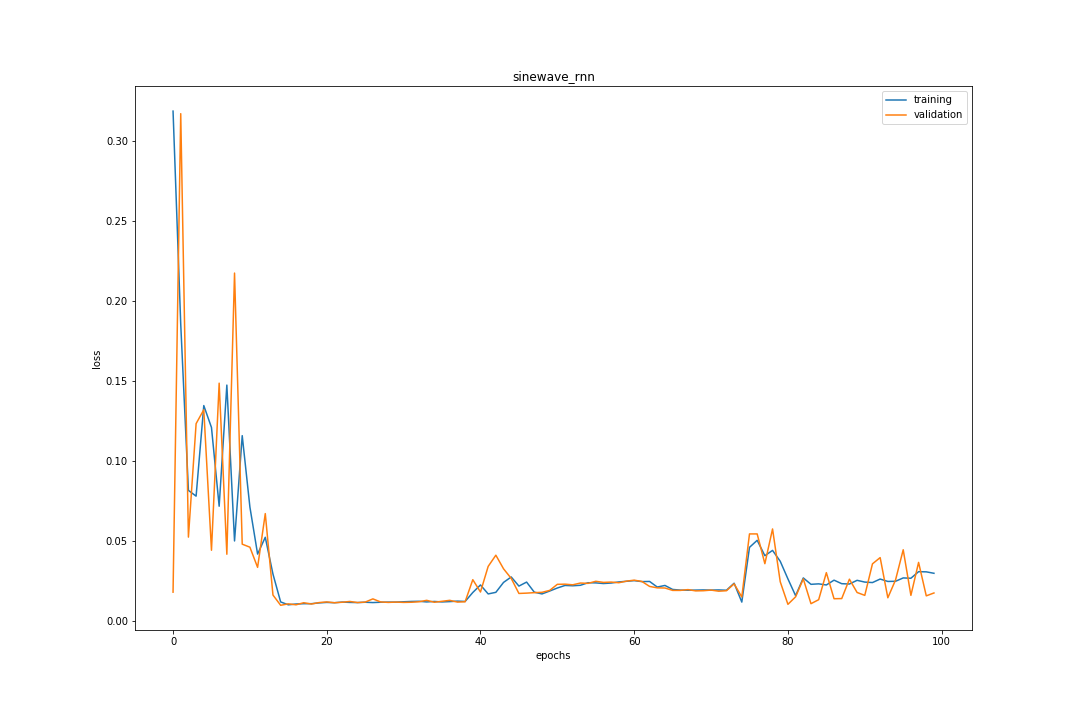

In [12]:
Image("experiments/sinewave_rnn/loss.png")

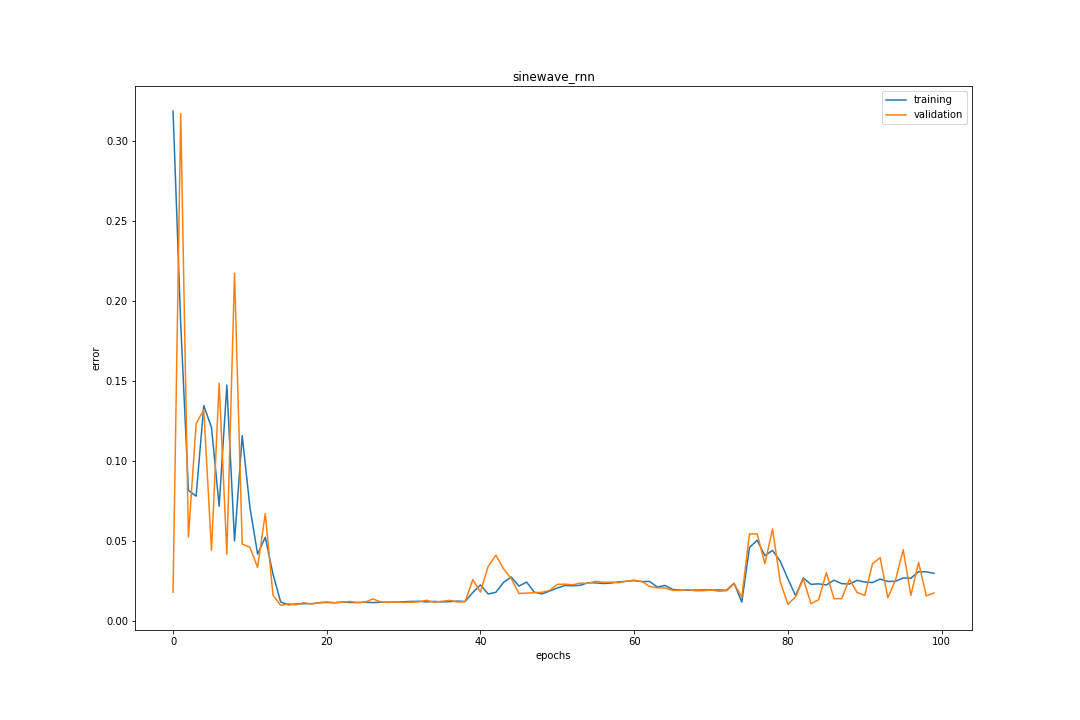

In [13]:
Image("experiments/sinewave_rnn/error.png")

# 5

## Conv Forward/Backward Checker

In [9]:
%autoreload
X = np.random.randn(2, 5, 6, 7)
dLdY = np.random.randn(2, 5, 6, 4)

# initialize a fully connected layer
# and perform a forward and backward pass
conv_layer = Conv2D(
    n_out=4,
    kernel_shape=(3, 3),
    activation="tanh",
    weight_init="uniform",
    pad="same",
)

student_forward = conv_layer.forward(X)
student_backward = conv_layer.backward(dLdY)

staff_forward = conv_layer.forward_faster(X)
staff_backward = conv_layer.backward_faster(dLdY)


print(f"It is {np.allclose(student_forward, staff_forward)} that `Conv2D.forward` is correct.")
print(f"It is {np.allclose(student_backward, staff_backward)} that `Conv2D.backward` is correct.")


It is True that `Conv2D.forward` is correct.
It is True that `Conv2D.backward` is correct.


In [4]:
%autoreload 2

X = np.random.randn(2, 5, 6, 7)
dLdY = np.random.randn(2, 5, 6, 4)

# initialize a fully connected layer
# and perform a forward and backward pass
conv_layer = Conv2D(
    n_out=4,
    kernel_shape=(3, 3),
    activation="linear",
    weight_init="uniform",
    pad="same",
)
_ = conv_layer.forward(X)
_ = conv_layer.backward(dLdY)

# check the gradients w.r.t. each parameter
for param in conv_layer.parameters:
    print(
        f"Relative error for {param}:",
        check_gradients(
            fn=conv_layer.forward_with_param(param, X),  # the function we are checking
            grad=conv_layer.gradients[param],  # the analytically computed gradient
            x=conv_layer.parameters[param],  # the variable w.r.t. which we are taking the gradient
            dLdf=dLdY,                     # gradient at previous layer
        )
    )

Relative error for W: 1.1620319076183368e-10
Relative error for b: 5.863115399347377e-11
